Esse notebook tem o objetivo de fazer as análises necessárias dos dados da plataforma EJ. 

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Base de dados

A base de dados é constituida de duas conversas, cada qual com N comentários e seus respectivos votos dos usuários, se concordam, passam ou discordam. 

O tema das duas conversas são:

- **Conversa 01**: Como os serviços públicos podem se adequar às demandas do cidadão do futuro?
- **Conversa 02**: O que pode ser feito para superar os desafios da transformação digital do governo?

# 01 . Análise dos votos

## # 01: Como os serviços públicos podem se adequar às demandas do cidadão do futuro?

In [2]:
# Importa os dados sobre a conversa 01
df_publ_futuro = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='serv publ futuro votes')

In [3]:
# Cria novas colunas com o tema da conversa e com valor categórico
df_publ_futuro['conversa'] = 'Como os serviços públicos podem se adequar às demandas do cidadão do futuro?'
df_publ_futuro['id_conversa'] = 1

In [4]:
df_publ_futuro.head()

,user_id,comment,choice,conversa,id_conversa
0,1,109,0,Como os serviços públicos podem se adequar às ...,1
1,1,104,1,Como os serviços públicos podem se adequar às ...,1
2,1,105,1,Como os serviços públicos podem se adequar às ...,1
3,1,113,-1,Como os serviços públicos podem se adequar às ...,1
4,1,115,0,Como os serviços públicos podem se adequar às ...,1


Os dados contém as colunas `user_id`, `comment` e `choice`
Onde existem três opções de voto em  `choice` relacionada comentário:
- 1 : Concordar
- 0 : Passar
- -1 : Discordar

In [5]:
print('Votos total da conversa 1:')
df_publ_futuro.shape

Votos total da conversa 1:


(5480, 5)

In [6]:
print('Comentários únicos da conversa 1:')
df_publ_futuro.comment.value_counts().shape[0]

Comentários únicos da conversa 1:


111

In [7]:
print('Usuários únicos da conversa 1:')
df_publ_futuro.user_id.value_counts().shape[0]

Usuários únicos da conversa 1:


395

In [8]:
print('Média de comentários por usuário:')
df_publ_futuro.groupby('user_id').comment.count().mean()

Média de comentários por usuário:


13.873417721518987

In [9]:
print('Maior quantidade de comentários de um usuário:')
df_publ_futuro.groupby('user_id').comment.count().max()

Maior quantidade de comentários de um usuário:


109

In [10]:
print('Menor quantidade de comentários de um usuário:')
df_publ_futuro.groupby('user_id').comment.count().min()

Menor quantidade de comentários de um usuário:


1

## # 02: O que pode ser feito para superar os desafios da transformação digital do governo?

In [11]:
df_transf_votes = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='desafios transf votes')

In [12]:
df_transf_votes['conversa'] = 'O que pode ser feito para superar os desafios da transformação digital do governo?'
df_transf_votes['id_conversa'] = 2

In [13]:
df_transf_votes.head()

,user_id,comment,choice,conversa,id_conversa
0,1,228,1,O que pode ser feito para superar os desafios ...,2
1,1,224,1,O que pode ser feito para superar os desafios ...,2
2,1,225,1,O que pode ser feito para superar os desafios ...,2
3,1,227,1,O que pode ser feito para superar os desafios ...,2
4,2,226,0,O que pode ser feito para superar os desafios ...,2


In [14]:
print('Votos total da conversa 2:')
df_transf_votes.shape

Votos total da conversa 2:


(3189, 5)

In [15]:
print('Comentários únicos da conversa 2:')
df_transf_votes.comment.value_counts().shape[0]

Comentários únicos da conversa 2:


97

In [16]:
print('Usuários únicos da conversa 2:')
df_transf_votes.user_id.value_counts().shape[0]

Usuários únicos da conversa 2:


184

In [17]:
print('Média de comentários por usuário:')
df_transf_votes.groupby('user_id').comment.count().mean()

Média de comentários por usuário:


17.331521739130434

In [18]:
print('Maior quantidade de comentários de um usuário:')
df_transf_votes.groupby('user_id').comment.count().max()

Maior quantidade de comentários de um usuário:


94

In [19]:
print('Menor quantidade de comentários de um usuário:')
df_transf_votes.groupby('user_id').comment.count().min()

Menor quantidade de comentários de um usuário:


1

# 02. Base de usuários

## 2.1 Conversa 01

### 2.1.1 Agrega por comentários

#### Criar coluna por votos

In [20]:
df_publ_futuro['agree'] = 0
df_publ_futuro['pass'] = 0
df_publ_futuro['disagree'] = 0

def label_votes (row):
    if row['choice'] == 0 :
        row['pass'] = 1
        return row
    if row['choice'] == 1 :
        row['agree'] = 1
        return row
    if row['choice'] == -1 :
        row['disagree'] = 1
        return row
    
df_publ_futuro = df_publ_futuro.apply(label_votes, axis=1)

In [21]:
df_publ_futuro.head()

,user_id,comment,choice,conversa,id_conversa,agree,pass,disagree
0,1,109,0,Como os serviços públicos podem se adequar às ...,1,0,1,0
1,1,104,1,Como os serviços públicos podem se adequar às ...,1,1,0,0
2,1,105,1,Como os serviços públicos podem se adequar às ...,1,1,0,0
3,1,113,-1,Como os serviços públicos podem se adequar às ...,1,0,0,1
4,1,115,0,Como os serviços públicos podem se adequar às ...,1,0,1,0


In [22]:
# Quantidade total de votos por opção
df_publ_futuro.groupby('comment')['agree','pass','disagree'].sum().sum()

agree       3348
pass        1744
disagree     388
dtype: int64

In [23]:
# Votos agrupados por comentário
df_votes_conversation_1 = df_publ_futuro.groupby('comment')['pass','agree','disagree'].sum()
df_votes_conversation_1.reset_index(inplace=True)

In [24]:
# Soma todos os votos por comentário e organiza de forma decrescente
df_votes_conversation_1['total_votes']=df_votes_conversation_1['pass']+df_votes_conversation_1['agree']+df_votes_conversation_1['disagree']
df_votes_conversation_1 = df_votes_conversation_1.sort_values('total_votes', ascending=False)

In [25]:
df_votes_conversation_1.head()

,comment,pass,agree,disagree,total_votes
13,115,41,73,11,125
10,112,39,79,6,124
0,102,39,72,12,123
14,116,29,87,5,121
12,114,34,81,5,120


#### Merge de comentários

In [26]:
# Importa os comentários da conversa 01
comments = pd.read_csv('data-ej/comments.csv')
#comments_conversation_1 = pd.read_csv('output/df_votes_comments_sheet1.csv')

In [27]:
comments.head(3)

,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id
0,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11
1,103,2018-11-23 14:36:48.164927+00,2018-11-23 14:36:48.166705+00,approved,2018-11-23 14:36:48.164938+00,Os orgãos de controle desestimulam a inovação ...,NaN,f,43,11
2,104,2018-11-23 14:36:48.16717+00,2018-11-23 14:36:48.168863+00,approved,2018-11-23 14:36:48.167179+00,Melhorar a convivência da gestão com o erro,NaN,f,43,11


In [28]:
comments_conversation_1 = comments[comments['id'].isin(df_votes_conversation_1.comment)]
comments_conversation_1.shape

(111, 10)

In [29]:
df_votes_conversation_1 = pd.merge(df_votes_conversation_1, comments_conversation_1, left_on='comment', right_on='id')

In [30]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,Digitalizar urgente todos os serviços,NaN,f,43,11
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,Implementar a identidade digital,NaN,f,43,11
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11


### 2.1.2 Agrega por usuários

In [31]:
# Importa base de usuários

serv_publ_humanista = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='serv publ cluster humanista')
serv_publ_tec = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='serv publ cluster tecnologico')
serv_publ_lider = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='serv publ cluster lider')

In [32]:
users_conversation_1 = pd.concat([serv_publ_humanista, serv_publ_lider, serv_publ_tec])

In [33]:
users_conversation_1.columns

Index(['id', 'firstname', 'lastname', 'genre'], dtype='object')

In [34]:
# Anonimiza os dados, retira informações de nome
users_conversation_1 = users_conversation_1[['id', 'genre']]
users_conversation_1.shape

(302, 2)

Os dados de gênero não existiam na base de dados, foi adicionado a partir dos nomes a fim de entender a relação dessa informações na classificação de perfil.

In [35]:
users_conversation_1.head()

,id,genre
0,12,0
1,20,0
2,38,1
3,60,1
4,53,0


### 2.1.3 Associar usuários aos votos

In [36]:
df_votes_users_conversation_1 = pd.merge(df_publ_futuro, users_conversation_1, how='left', left_on='user_id', right_on='id')

In [37]:
df_votes_users_conversation_1.head()

,user_id,comment,choice,conversa,id_conversa,agree,pass,disagree,id,genre
0,1,109,0,Como os serviços públicos podem se adequar às ...,1,0,1,0,1.0,0.0
1,1,104,1,Como os serviços públicos podem se adequar às ...,1,1,0,0,1.0,0.0
2,1,105,1,Como os serviços públicos podem se adequar às ...,1,1,0,0,1.0,0.0
3,1,113,-1,Como os serviços públicos podem se adequar às ...,1,0,0,1,1.0,0.0
4,1,115,0,Como os serviços públicos podem se adequar às ...,1,0,1,0,1.0,0.0


In [38]:
df_votes_users_conversation_1.shape

(5480, 10)

In [39]:
# Agrupar por usuários
df_groupby_user_1 = df_votes_users_conversation_1.groupby('user_id')['pass','agree','disagree'].sum()
df_groupby_user_1.reset_index(inplace=True)

In [40]:
df_groupby_user_1.shape

(395, 4)

In [41]:
# Somar votos e ordenar 
df_groupby_user_1['sum_votes_by_user'] = df_groupby_user_1['pass']+df_groupby_user_1.agree+df_groupby_user_1.disagree

In [42]:
df_groupby_user_1 = df_groupby_user_1.sort_values('sum_votes_by_user', ascending=False)
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user
308,309,0,92,17,109
292,293,31,56,14,101
285,286,0,93,4,97
209,210,0,96,0,96
205,206,80,13,0,93


In [43]:
df_groupby_user_1 = pd.merge(df_groupby_user_1, users_conversation_1, how='left', left_on='user_id', right_on='id')

In [44]:
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre
0,309,0,92,17,109,NaN,NaN
1,293,31,56,14,101,293.0,1.0
2,286,0,93,4,97,286.0,1.0
3,210,0,96,0,96,210.0,2.0
4,206,80,13,0,93,206.0,1.0


In [45]:
df_groupby_user_1.shape

(395, 7)

In [46]:
df_groupby_user_1.isna().sum()

user_id               0
pass                  0
agree                 0
disagree              0
sum_votes_by_user     0
id                   93
genre                93
dtype: int64

Possuem 93 usuários sem identificação de id com a base de dados de usuários.    
Para esses ids, o gênero será classificado como `não identificado`.

In [47]:
df_groupby_user_1['genre'] = df_groupby_user_1.genre.fillna(2)

In [48]:
df_groupby_user_1.isna().sum()

user_id               0
pass                  0
agree                 0
disagree              0
sum_votes_by_user     0
id                   93
genre                 0
dtype: int64

## 2.2 Conversa 02

### 2.2.1 Agrega por comentários

#### Criar coluna por votos 

In [49]:
df_transf_votes['agree'] = 0
df_transf_votes['pass'] = 0
df_transf_votes['disagree'] = 0
    
df_transf_votes = df_transf_votes.apply(label_votes, axis=1)

In [50]:
df_transf_votes.head()

,user_id,comment,choice,conversa,id_conversa,agree,pass,disagree
0,1,228,1,O que pode ser feito para superar os desafios ...,2,1,0,0
1,1,224,1,O que pode ser feito para superar os desafios ...,2,1,0,0
2,1,225,1,O que pode ser feito para superar os desafios ...,2,1,0,0
3,1,227,1,O que pode ser feito para superar os desafios ...,2,1,0,0
4,2,226,0,O que pode ser feito para superar os desafios ...,2,0,1,0


In [51]:
# Quantidade total de votos por opção
df_transf_votes.groupby('comment')['agree','pass','disagree'].sum().sum()

agree       1750
pass        1261
disagree     178
dtype: int64

In [52]:
# Votos agrupados por comentário
df_votes_conversation_2 = df_transf_votes.groupby('comment')['pass','agree','disagree'].sum()
df_votes_conversation_2.reset_index(inplace=True)

In [53]:
# Soma todos os votos por comentário e organiza de forma decrescente
df_votes_conversation_2['total_votes']=df_votes_conversation_2['pass']+df_votes_conversation_2['agree']+df_votes_conversation_2['disagree']
df_votes_conversation_2 = df_votes_conversation_2.sort_values('total_votes', ascending=False)

In [54]:
df_votes_conversation_2.head()

,comment,pass,agree,disagree,total_votes
2,226,45,42,4,91
0,224,46,34,7,87
3,227,38,44,3,85
1,225,35,42,6,83
9,261,29,48,5,82


#### Merge de comentários

In [55]:
# Importa os comentários da conversa 02
# comments = pd.read_csv('data-ej/comments.csv')
# comments_conversation_1 = pd.read_csv('output/df_votes_comments_sheet1.csv')

In [56]:
comments.head(3)

,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id
0,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11
1,103,2018-11-23 14:36:48.164927+00,2018-11-23 14:36:48.166705+00,approved,2018-11-23 14:36:48.164938+00,Os orgãos de controle desestimulam a inovação ...,NaN,f,43,11
2,104,2018-11-23 14:36:48.16717+00,2018-11-23 14:36:48.168863+00,approved,2018-11-23 14:36:48.167179+00,Melhorar a convivência da gestão com o erro,NaN,f,43,11


In [57]:
comments_conversation_2 = comments[comments['id'].isin(df_votes_conversation_2.comment)]
comments_conversation_2.shape

(97, 10)

In [58]:
comments_conversation_2.shape

(97, 10)

In [59]:
df_votes_conversation_2 = pd.merge(df_votes_conversation_2, comments_conversation_2, left_on='comment', right_on='id')

In [60]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,Os serviços devem ser cada vez mais oferecidos...,NaN,f,43,15
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,A partir da mudança do marco normativo e da cu...,NaN,f,43,15
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,Ouvindo o cidadão. Participação social na veia!,NaN,f,43,15


### 2.2.2 Agrega por usuários

In [61]:
# Importa base de usuários

desafios_humanista = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='desafios cluster humanista')
desafios_tec = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='desafios cluster tecnologico')
desafios_lider = pd.read_excel('data-ej/dados-semana-inovação.xlsx', sheet_name='desafios cluster lider')

In [62]:
users_conversation_2 = pd.concat([desafios_humanista, desafios_lider, desafios_tec])

In [63]:
users_conversation_2.columns

Index(['id', 'firstname', 'lastname', 'genre'], dtype='object')

In [64]:
# Anonimiza os dados, retira informações de nome
users_conversation_2 = users_conversation_2[['id', 'genre']]
users_conversation_2.shape

(86, 2)

Os dados de gênero não existiam na base de dados, foi adicionado a partir dos nomes a fim de entender a relação dessa informações na classificação de perfil.

In [65]:
users_conversation_2.head(3)

,id,genre
0,124,2
1,58,0
2,22,2


### 2.2.3 Associar usuários aos votos

In [66]:
df_votes_users_conversation_2 = pd.merge(df_transf_votes, users_conversation_2, how='left', left_on='user_id', right_on='id')

In [67]:
df_votes_users_conversation_2.head()

,user_id,comment,choice,conversa,id_conversa,agree,pass,disagree,id,genre
0,1,228,1,O que pode ser feito para superar os desafios ...,2,1,0,0,1.0,1.0
1,1,224,1,O que pode ser feito para superar os desafios ...,2,1,0,0,1.0,1.0
2,1,225,1,O que pode ser feito para superar os desafios ...,2,1,0,0,1.0,1.0
3,1,227,1,O que pode ser feito para superar os desafios ...,2,1,0,0,1.0,1.0
4,2,226,0,O que pode ser feito para superar os desafios ...,2,0,1,0,2.0,0.0


In [68]:
df_votes_users_conversation_2.shape, df_transf_votes.shape

((3189, 10), (3189, 8))

In [69]:
# Agrupar por usuários
df_groupby_user_2 = df_votes_users_conversation_2.groupby('user_id')['pass','agree','disagree'].sum()
df_groupby_user_2.reset_index(inplace=True)

In [70]:
df_groupby_user_2.shape

(184, 4)

In [71]:
# Somar votos e ordenar (decrescente)
df_groupby_user_2['sum_votes_by_user'] = df_groupby_user_2['pass']+df_groupby_user_2.agree+df_groupby_user_2.disagree

In [72]:
df_groupby_user_2 = df_groupby_user_2.sort_values('sum_votes_by_user', ascending=False)
df_groupby_user_2.head()

,user_id,pass,agree,disagree,sum_votes_by_user
130,131,12,82,0,94
68,69,52,42,0,94
57,58,29,26,39,94
154,155,20,70,3,93
153,154,40,38,15,93


In [73]:
df_groupby_user_2 = pd.merge(df_groupby_user_2, users_conversation_2, how='left', left_on='user_id', right_on='id')

In [74]:
df_groupby_user_2.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre
0,131,12,82,0,94,131.0,2.0
1,69,52,42,0,94,69.0,0.0
2,58,29,26,39,94,58.0,0.0
3,155,20,70,3,93,155.0,2.0
4,154,40,38,15,93,154.0,1.0


In [75]:
df_groupby_user_2.shape

(184, 7)

In [76]:
df_groupby_user_2.isna().sum()

user_id               0
pass                  0
agree                 0
disagree              0
sum_votes_by_user     0
id                   98
genre                98
dtype: int64

Possuem 98 usuários sem identificação de id com a base de dados de usuários.    
Para esses ids, o gênero será classificado como `não identificado`.

In [77]:
df_groupby_user_2['genre'] = df_groupby_user_2.genre.fillna(2)

In [78]:
df_groupby_user_2.isna().sum()

user_id               0
pass                  0
agree                 0
disagree              0
sum_votes_by_user     0
id                   98
genre                 0
dtype: int64

### Distribuição de gênero

In [79]:
df_genre = pd.DataFrame(df_groupby_user_1.genre.value_counts().reset_index().rename(columns={"index":"genre", "genre":"total_votes_1"}))

In [80]:
df_genre

,genre,total_votes_1
0,2.0,237
1,0.0,86
2,1.0,72


In [81]:
df_genre = pd.merge(df_genre, pd.DataFrame(df_groupby_user_2.genre.value_counts()).reset_index(), left_on='genre', right_on='index')

In [82]:
df_genre.rename(columns={"genre_y":"total_votes_2", "genre_x":"genre"}, inplace=True)

In [83]:
df_genre.loc[df_genre.genre==2,'label']='Não identificado'
df_genre.loc[df_genre.genre==0,'label']='Masculino'
df_genre.loc[df_genre.genre==1,'label']='Feminino'

In [84]:
df_genre.loc[df_genre.genre==2][['total_votes_1','total_votes_2']].values[0]

array([237, 124])

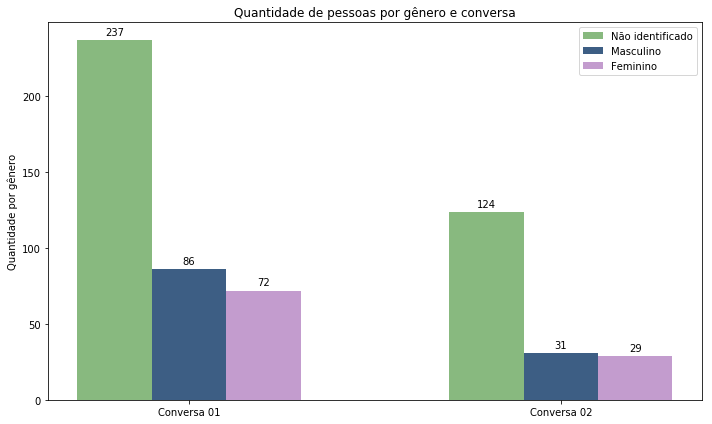

In [85]:
labels = ['Conversa 01','Conversa 02']#df_genre.label#['Masculino', 'Feminino', 'Não identificado']
genre_2 = df_genre.loc[df_genre.genre==2][['total_votes_1','total_votes_2']].values[0] #df_genre.total_votes_1#[20, 34, 30]
genre_1 = df_genre.loc[df_genre.genre==0][['total_votes_1','total_votes_2']].values[0] #df_genre.total_votes_2 #[25, 32, 34]
genre_0 = df_genre.loc[df_genre.genre==1][['total_votes_1','total_votes_2']].values[0] #= [1,4]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, genre_2, width, color='#88B97F', label='Não identificado')
rects2 = ax.bar(x , genre_1, width, color='#3D5E84',label='Masculino')
rects3 = ax.bar(x + width, genre_0, width, color='#C39CCE',label='Feminino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade por gênero')
ax.set_title('Quantidade de pessoas por gênero e conversa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

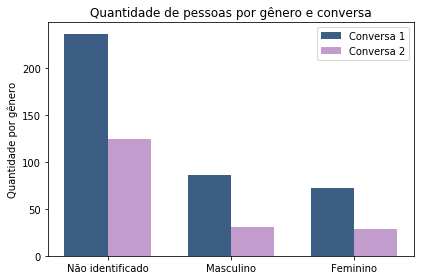

In [86]:
labels = df_genre.label#['Masculino', 'Feminino', 'Não identificado']
conversation_1 = df_genre.total_votes_1#[20, 34, 30]
conversation_2 = df_genre.total_votes_2 #[25, 32, 34]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, conversation_1, width, color='#3D5E84', label='Conversa 1')
rects2 = ax.bar(x + width/2, conversation_2, width, color='#C39CCE',label='Conversa 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade por gênero')
ax.set_title('Quantidade de pessoas por gênero e conversa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

#### Checando todos os usuários das duas conversas

In [87]:
# A duplicidade invalida a junção dos dados dos usuários
pd.concat([users_conversation_1,users_conversation_2]).id.value_counts()[:10]

1      2
65     2
102    2
98     2
95     2
94     2
90     2
88     2
76     2
70     2
Name: id, dtype: int64

In [88]:
df_votes_conversation_2.total_votes.max()

91

In [89]:
df_groupby_user_2.shape

(184, 7)

In [90]:
91/184

0.4945652173913043

In [91]:
df_votes_conversation_1['participation'] = df_votes_conversation_1.total_votes/395*100
df_votes_conversation_2['participation'] = df_votes_conversation_2.total_votes/184*100

In [92]:
df_votes_conversation_1.loc[df_votes_conversation_1.participation>30].shape, df_votes_conversation_2.loc[df_votes_conversation_2.participation>30].shape

((5, 16), (18, 16))

In [93]:
5/111, 18/97

(0.04504504504504504, 0.18556701030927836)

In [94]:
95/111 , 69/97

(0.8558558558558559, 0.711340206185567)

In [95]:
df_votes_conversation_1.shape, df_votes_conversation_2.shape

((111, 16), (97, 16))

In [96]:
# df = pd.DataFrame({'radius': [df_votes_conversation_1.not_votes_users.sum(), df_votes_conversation_1.total_votes.sum()]},
#                     index=['Não vistos', 'Votados'])
# df.plot.pie(y='radius', figsize=(5, 5))

In [97]:
# df_votes_conversation_1.not_votes_users.sum(), df_votes_conversation_1.total_votes.sum()

In [98]:
# df_votes_conversation_2.not_votes_users.sum(), df_votes_conversation_2.total_votes.sum()

In [99]:
# score_india = [df_votes_conversation_1.not_votes_users.sum(), df_votes_conversation_1.total_votes.sum()]
# legend = ['India', 'Pakistan']
# score_pk = [df_votes_conversation_2.not_votes_users.sum(), df_votes_conversation_2.total_votes.sum()]
# plt.hist(x=[score_india, score_pk], color=['orange', 'green'])
# #plt.xlabel("Runs/Delivery")
# #plt.ylabel("Frequency")
# plt.legend(legend)
# plt.xticks(range(0, 1))
# #plt.yticks(range(1, 20))
# plt.title('Champions Trophy 2017 Final\n Runs scored in 3 overs')
# plt.show()

In [100]:
# df_votes_conversation_1.plot( x='comment', y='total_votes', kind='hist')

In [101]:
# np.random.seed(0)
# df = pd.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B'])
# fig, ax = plt.subplots()

# a_heights, a_bins = np.histogram(df['A'])
# b_heights, b_bins = np.histogram(df['B'], bins=a_bins)

# width = (a_bins[1] - a_bins[0])/3

# ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
# ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
# #seaborn.despine(ax=ax, offset=10)

In [102]:
# score_india = [1,2,3]
# legend = ['India', 'Pakistan']
# score_pk = [3,5,6]
# plt.hist([score_india, score_pk], color=['orange', 'green'])
# #plt.xlabel("Runs/Delivery")
# #plt.ylabel("Frequency")
# plt.legend(legend)
# #plt.xticks(range(0, 7))
# #plt.yticks(range(1, 20))
# plt.title('Champions Trophy 2017 Final\n Runs scored in 3 overs')
# plt.show()

In [103]:
# sorted(df_votes_conversation_1.comment)

In [104]:
# df_votes_conversation_1.not_votes_users.plot.hist()

In [105]:
df_groupby_user_1.head(2)

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre
0,309,0,92,17,109,NaN,2.0
1,293,31,56,14,101,293.0,1.0


In [106]:
#df_users = pd.concat([df_groupby_user_1,df_groupby_user_2])

In [107]:
#df_users.shape, 395+184

## 2.3 Votos por usuário - Histograma

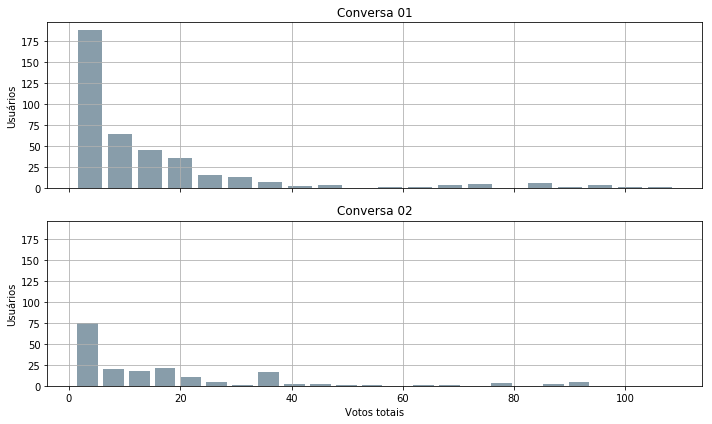

In [108]:
c1 = df_groupby_user_1.sum_votes_by_user
c2 = df_groupby_user_2.sum_votes_by_user

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 6) ,sharey='all', sharex='col')

ax0.hist(c1, bins=20,  histtype='bar', color='#607c8e', rwidth=0.8, alpha=0.75) # histtype='stepfilled'
ax0.set_title('Conversa 01')
ax0.set_ylabel('Usuários')
ax0.grid()

ax1.hist(c2, bins=20, histtype='bar', color='#607c8e', rwidth=0.8, alpha=0.75)
ax1.set_title('Conversa 02')

plt.xlabel('Votos totais')
plt.ylabel('Usuários')
fig.tight_layout()
ax1.grid()


plt.savefig('histogram_comparative_votes_per_user.png', dpi=300)#, transparent=True)

## 2.4 PCA e Kmeans

#### Usuários que votaram até 5 comentários

In [109]:
# Usuários da conversa 01 que responderam n<=5 comentários
a = df_groupby_user_1.loc[df_groupby_user_1.sum_votes_by_user<=5].shape[0]
b = df_groupby_user_1.shape[0] 
a, b, a/b

(168, 395, 0.4253164556962025)

In [110]:
# Usuários da conversa 02 que responderam n<=5 comentários
a = df_groupby_user_2.loc[df_groupby_user_2.sum_votes_by_user<=5].shape[0]
b = df_groupby_user_2.shape[0] 
a, b, a/b

(75, 184, 0.4076086956521739)

In [111]:
df_groupby_user_1.sum_votes_by_user.max(), df_groupby_user_2.sum_votes_by_user.max() 

(109, 94)

In [112]:
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre
0,309,0,92,17,109,NaN,2.0
1,293,31,56,14,101,293.0,1.0
2,286,0,93,4,97,286.0,1.0
3,210,0,96,0,96,210.0,2.0
4,206,80,13,0,93,206.0,1.0


In [113]:
109/111, 94/97

(0.9819819819819819, 0.9690721649484536)

In [114]:
df_votes_conversation_2.shape[0]

97

Muitos comentários não foram visualizados pelo usuários. Cerca de 40% responderam 5 ou menos comentários. O usuário que mais respondeu, ao total foram 109 comentários pertencente à `conversa 1`. Para a análise teve de se considerar mais uma opção, comentários não visualizados, totalizando 4 categorias possíveis para cada comentário:
- Discordar
- Passar
- Concordar
- Não visualizado

As reações correspondem respectivamente -1, 0 e 1, e para os comentários não visualizados foram utilizados o cálculo das médias das respostas, podendo transitar então entre o valor mínimo e máximo, e que não tenha o grau de importância indevido. Segue uma imagem explicativa. (antes tava 2 por ex) 

<img src="images/fluxograma_categoria_votos.png" width=500px>

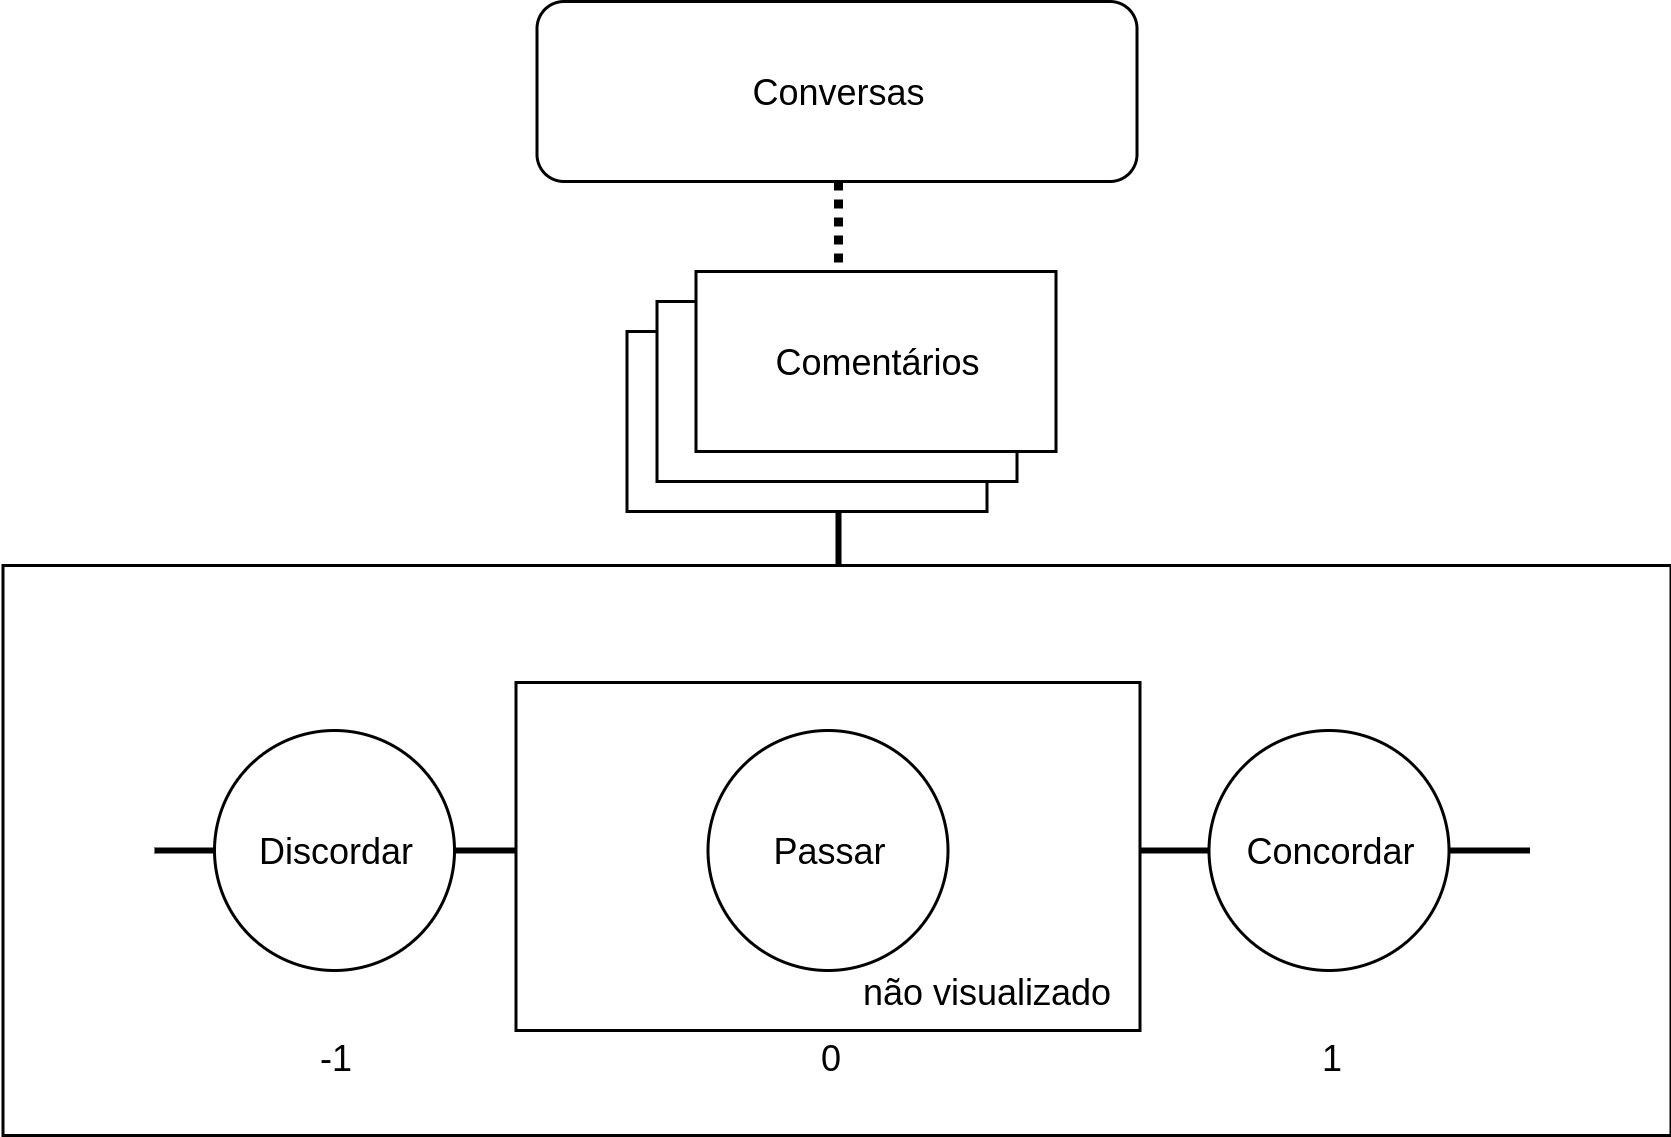

### 2.4.1 Conversa 01

In [115]:
# Cria uma matriz, onde cada coluna represta um comentário, e cada linha um usuário e seu respectivo voto
df_matrix_votes_1 = df_publ_futuro[['user_id','comment','choice']].pivot(index ='user_id', columns ='comment')

In [116]:
df_matrix_votes_1.head(3)

choice                                               ...           \
comment    102  103  104  105  106  107  108  109  110  111  ...  354 356   
user_id                                                      ...            
1          1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  ...  NaN NaN   
2          0.0  NaN  0.0  NaN  NaN  0.0  1.0  NaN  1.0  0.0  ...  0.0 NaN   
3          NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN   

                                           
comment  359 360 361  363 364 368 369 373  
user_id                                    
1        NaN NaN NaN  NaN NaN NaN NaN NaN  
2        0.0 NaN NaN  1.0 NaN NaN NaN NaN  
3        NaN NaN NaN  NaN NaN NaN NaN NaN  

[3 rows x 111 columns]

In [117]:
# Comentários que menos foram visualizados
df_matrix_votes_1.isna().sum().sort_values(ascending=False).head()

        comment
choice  373        393
        360        389
        369        389
        364        388
        359        387
dtype: int64

#### Categorias
- -1 : Discorda
- 0 : Passa
- 1 : Concorda
- média : Média dos votos

In [118]:
# Considerando a média dos votos de cada comentário como a opção não vista
df_matrix_votes_1 = df_matrix_votes_1.choice.fillna(df_matrix_votes_1.choice.mean())

In [119]:
#df_matrix_votes_1 = df_publ_futuro[df_publ_futuro['comment'].isin(df_votes_conversation_1.comment[df_votes_conversation_1.total_votes >= 50])]

In [120]:
# Considerando a média dos votos de cada comentário como a opção não vista
#################################### fillna 2
# df_matrix_votes_1 = df_matrix_votes_1.choice.fillna(2)

In [121]:
# df_matrix_votes_1 = df_matrix_votes_1[['user_id','comment','choice']].pivot(index ='user_id', columns ='comment')
# df_matrix_votes_1.shape

In [122]:
df_matrix_votes_1.head(3)

comment,102,103,104,105,106,107,108,109,110,111,...,354,356,359,360,361,363,364,368,369,373
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0000,0.000000,1.000000,...,0.692308,0.583333,0.875,0.666667,0.545455,0.777778,0.714286,0.7,0.0,1.0
2,0.000000,0.286957,0.000000,0.447368,0.504587,0.000000,1.000000,0.6875,1.000000,0.000000,...,0.000000,0.583333,0.000,0.666667,0.545455,1.000000,0.714286,0.7,0.0,1.0
3,0.487805,0.000000,0.393162,0.447368,0.504587,0.669811,0.682692,0.6875,0.727273,0.568966,...,0.692308,0.583333,0.875,0.666667,0.545455,0.777778,0.714286,0.7,0.0,1.0


### PCA

In [123]:
# Redução de dimensionalidade
pca = PCA(n_components=2).fit_transform(df_matrix_votes_1)

### Kmeans

In [124]:
# Assumindo 4 a quantidade de clusters para a classificação de perfis 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[ 0.07873686  0.07457073]
 [ 2.71790868 -0.25872429]
 [-3.75180672  0.62484016]
 [-1.08261209 -0.67302279]]


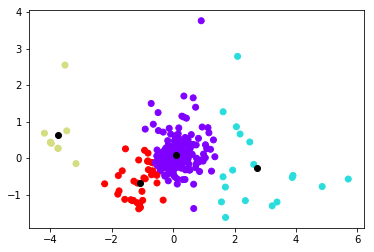

In [126]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

### Analisar com o mínimo de votos não vistos

In [127]:
# Analisando comentários que tenham pelo menos 50 votos
df_matrix_votes_min_1 = df_publ_futuro[df_publ_futuro['comment'].isin(df_votes_conversation_1.comment[df_votes_conversation_1.total_votes >= 50])]

In [128]:
df_matrix_votes_min_1 = df_matrix_votes_min_1[['user_id','comment','choice']].pivot(index ='user_id', columns ='comment')
df_matrix_votes_min_1.shape

(356, 36)

In [129]:
############### teste fillna = 2
#df_matrix_votes_min_1 = df_matrix_votes_min_1.fillna(2)

In [130]:
df_matrix_votes_min_1 = df_matrix_votes_min_1.fillna(df_matrix_votes_min_1.mean())

In [131]:
df_matrix_votes_min_1.head(3)

choice                                                              \
comment       102       103       104       105       106       107       108   
user_id                                                                         
1        1.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
2        0.000000  0.286957  0.000000  0.447368  0.504587  0.000000  1.000000   
3        0.487805  0.000000  0.393162  0.447368  0.504587  0.669811  0.682692   

                                     ...                                      \
comment     109       110       111  ...       139       140   141       142   
user_id                              ...                                       
1        0.0000  0.000000  1.000000  ...  0.472222  0.486111  0.36  0.638889   
2        0.6875  1.000000  0.000000  ...  0.472222  0.486111  0.36  0.638889   
3        0.6875  0.727273  0.568966  ...  0.472222  0.486111  0.36  0.638889   

                                                                    
comment      143       144       145       146       147       151  
user_id                                                             
1        0.41791  0.457143  0.433962  0.612903  0.442308  0.574074  
2        0.41791  0.457143  0.433962  1.000000  0.442308  0.574074  
3        0.41791  0.457143  0.433962  0.612903  0.442308  0.574074  

[3 rows x 36 columns]

In [132]:
# PCA
pca_f = PCA(n_components=3)
pca = pca_f.fit_transform(df_matrix_votes_min_1)

In [133]:
# Kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[-0.01216216  1.31896368  0.01216311]
 [ 1.7931375  -0.37540591 -0.0852905 ]
 [ 0.00340562 -0.03752532  0.01199987]
 [-1.87342417 -0.37348911 -0.03000128]]


In [135]:
points = P1, P2 = pca_f.transform(df_matrix_votes_min_1.mean().values[None, :] * 0 + 1), pca_f.transform(df_matrix_votes_min_1.mean().values[None, :] * 0 - 1),
points

(array([[-2.67753479, -0.11265728,  0.07395696]]),
 array([[ 8.75074261, -0.82580987, -1.39973155]]))

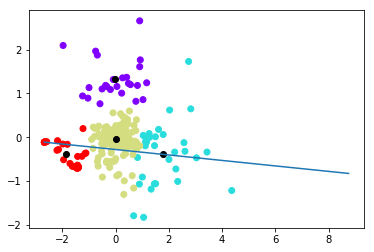

In [136]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

x1, y1 = P1[0, :2]
x2, y2 = P2[0, :2]
plt.plot([x1, x2], [y1, y2])

### 2.4.2 Conversa 02

In [137]:
# Cria uma matriz, onde cada coluna represta um comentário, e cada linha um usuário e seu respectivo voto
df_matrix_votes_2 = df_transf_votes[['user_id','comment','choice']].pivot(index ='user_id', columns ='comment')

In [138]:
df_matrix_votes_2.head(3)

choice                                           ...                  \
comment    224  225  226  227  228 248  249 250 257 261  ... 347 348 352 353   
user_id                                                  ...                   
1          1.0  1.0  1.0  1.0  1.0 NaN  1.0 NaN NaN NaN  ... NaN NaN NaN NaN   
2          0.0  0.0  0.0  0.0  0.0 NaN  NaN NaN NaN NaN  ... NaN NaN NaN NaN   
3          1.0  1.0  1.0  1.0  1.0 NaN  NaN NaN NaN NaN  ... NaN NaN NaN NaN   

                                 
comment 357 358 362 365 366 367  
user_id                          
1       NaN NaN NaN NaN NaN NaN  
2       NaN NaN NaN NaN NaN NaN  
3       NaN NaN NaN NaN NaN NaN  

[3 rows x 97 columns]

In [139]:
# Comentários que menos foram visualizados
df_matrix_votes_2.isna().sum().sort_values(ascending=False).head()

        comment
choice  365        183
        366        183
        367        182
        362        179
        348        177
dtype: int64

#### Categorias
- -1 : Discorda
- 0 : Passa
- 1 : Concorda
- média : Média dos votos

In [140]:
# Considerando a média dos votos de cada comentário como a opção não vista
df_matrix_votes_2 = df_matrix_votes_2.choice.fillna(df_matrix_votes_2.choice.mean())

In [141]:
df_matrix_votes_2.head(3)

comment,224,225,226,227,228,248,249,250,257,261,...,347,348,352,353,357,358,362,365,366,367
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.567568,1.00,0.28,0.526316,0.52439,...,0.714286,0.428571,0.3,0.666667,0.375,0.222222,0.4,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.567568,0.52,0.28,0.526316,0.52439,...,0.714286,0.428571,0.3,0.666667,0.375,0.222222,0.4,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.567568,0.52,0.28,0.526316,0.52439,...,0.714286,0.428571,0.3,0.666667,0.375,0.222222,0.4,0.0,1.0,0.0


### PCA

In [142]:
# Redução de dimensionalidade
pca = PCA(n_components=2).fit_transform(df_matrix_votes_2)

### Kmeans

In [143]:
# Assumindo 4 a quantidade de clusters para a classificação de perfis 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [144]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[-0.02518096  0.01575173]
 [ 1.75662488 -0.62807345]
 [ 6.4360343   6.18699181]
 [-2.03163392  0.33533073]]


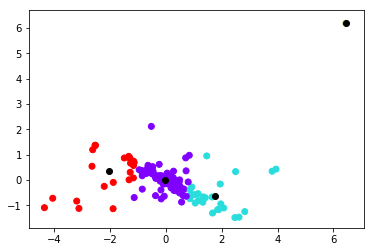

In [145]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

### Analisar com o mínimo de votos não vistos

In [146]:
# Analisando comentários que tenham pelo menos 50 votos
df_matrix_votes_min_2 = df_transf_votes[df_transf_votes['comment'].isin(df_votes_conversation_2.comment[df_votes_conversation_2.total_votes >= 50])]

In [147]:
df_matrix_votes_min_2 = df_matrix_votes_min_2[['user_id','comment','choice']].pivot(index ='user_id', columns ='comment')
df_matrix_votes_min_2.shape

(165, 26)

In [148]:
df_matrix_votes_min_2 = df_matrix_votes_min_2.fillna(df_matrix_votes_min_2.mean())

In [149]:
df_matrix_votes_min_2.head(3)

choice                                                               \
comment    224  225  226  227  228       248   249   250       257      261   
user_id                                                                       
1          1.0  1.0  1.0  1.0  1.0  0.567568  1.00  0.28  0.526316  0.52439   
2          0.0  0.0  0.0  0.0  0.0  0.567568  0.52  0.28  0.526316  0.52439   
3          1.0  1.0  1.0  1.0  1.0  0.567568  0.52  0.28  0.526316  0.52439   

         ...                                                               \
comment  ...       278   279       280       281       282  283       286   
user_id  ...                                                                
1        ...  1.000000  1.00  0.481481  0.592593  1.000000  1.0  0.584906   
2        ...  0.448276  0.65  0.481481  0.592593  0.481481  0.3  0.584906   
3        ...  0.448276  0.65  0.481481  0.592593  0.481481  0.3  0.584906   

                                       
comment       287       288       289  
user_id                                
1        0.641509  1.000000  0.358491  
2        0.641509  0.622642  0.358491  
3        0.641509  0.622642  0.358491  

[3 rows x 26 columns]

In [150]:
# PCA
pca_f = PCA(n_components=3)
pca = pca_f.fit_transform(df_matrix_votes_min_2)

In [151]:
# Kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [152]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[ 4.06229148e-02  4.29820877e-02 -4.65157409e-02]
 [-1.56648839e+00 -3.04888736e-01 -1.48745958e-03]
 [ 1.74924156e+00 -3.05254064e-01 -9.73165802e-02]
 [ 6.79589363e-02  1.23334225e+00  6.40303720e-01]]


In [153]:
points = P1, P2 = pca_f.transform(df_matrix_votes_min_2.mean().values[None, :] * 0 + 1), pca_f.transform(df_matrix_votes_min_2.mean().values[None, :] * 0 - 1),
points

(array([[-2.58498168, -0.2452201 , -0.05526867]]),
 array([[ 7.4003187 , -0.86762894, -0.92345995]]))

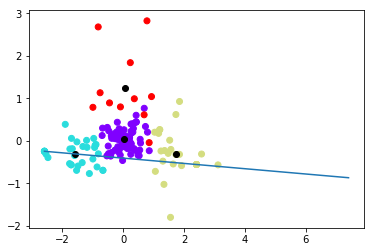

In [154]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

x1, y1 = P1[0, :2]
x2, y2 = P2[0, :2]
plt.plot([x1, x2], [y1, y2])

A linha acima representa no extremo esquerdo o usuário que concordou com todos os comentários, e no extremo direito o usuário que discordou de todos os comentários.

## 2.5 Correlação dos dados

### 2.5.1 Conversa 01

In [155]:
# Agrupa por autor, criador do comentário

df_votes_by_author_1 = df_votes_conversation_1.groupby('author_id')['pass','agree','disagree','total_votes'].sum()

In [156]:
df_votes_by_author_1.reset_index(inplace=True)

In [157]:
df_votes_by_author_1.head()

,author_id,pass,agree,disagree,total_votes
0,21,2,7,0,9
1,43,472,1097,154,1723
2,61,33,47,15,95
3,62,57,148,9,214
4,66,25,61,2,88


In [158]:
len(df_votes_by_author_1)

90

In [159]:
df_groupby_user_1[df_groupby_user_1['user_id'].isin(df_votes_by_author_1.author_id.values)].shape, df_groupby_user_1.shape

((71, 7), (395, 7))

In [160]:
# Cria coluna binária que checa se o usuário criou algum comentário
df_groupby_user_1['created_comment'] = 0
df_groupby_user_1.loc[df_groupby_user_1['user_id'].isin(df_votes_by_author_1.author_id.values), 'created_comment'] = 1

In [161]:
df_groupby_user_1.created_comment.isna().sum()

0

In [162]:
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre,created_comment
0,309,0,92,17,109,NaN,2.0,0
1,293,31,56,14,101,293.0,1.0,1
2,286,0,93,4,97,286.0,1.0,0
3,210,0,96,0,96,210.0,2.0,0
4,206,80,13,0,93,206.0,1.0,0


In [163]:
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre,created_comment
0,309,0,92,17,109,NaN,2.0,0
1,293,31,56,14,101,293.0,1.0,1
2,286,0,93,4,97,286.0,1.0,0
3,210,0,96,0,96,210.0,2.0,0
4,206,80,13,0,93,206.0,1.0,0


In [164]:
df_groupby_user_1['unseen'] = df_votes_conversation_1.shape[0] - df_groupby_user_1.sum_votes_by_user

In [165]:
df_votes_conversation_1.shape[0]

111

In [166]:
# Cria colunas para entender as porcentagens dos votos dos usuários
df_groupby_user_1['agree_percentage'] = df_groupby_user_1['agree']/df_groupby_user_1['sum_votes_by_user']
df_groupby_user_1['pass_percentage'] = df_groupby_user_1['pass']/df_groupby_user_1['sum_votes_by_user']
df_groupby_user_1['disagree_percentage'] = df_groupby_user_1['disagree']/df_groupby_user_1['sum_votes_by_user']
df_groupby_user_1['unseen_percentage'] = df_groupby_user_1['unseen']/df_groupby_user_1['sum_votes_by_user']

Interpretando p (correlação) [ref](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Interpretando_'%22%60UNIQ--postMath-0000000A-QINU%60%22'[1])

- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [167]:
# Normalização dos dados min/max
# df_user_norm_1 = (df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].max() - df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]].min())

In [168]:
df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]].std()

sum_votes_by_user      19.026409
genre                   0.820542
agree_percentage        0.368435
pass_percentage         0.366403
disagree_percentage     0.159627
unseen_percentage      35.459140
created_comment         0.384463
dtype: float64

In [169]:
# Normalização dos dados mean
df_user_norm_1 = (df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].std()) 
#(df-df.mean())/df.std()

In [170]:
df_user_norm_1.corr()

,sum_votes_by_user,genre,agree_percentage,pass_percentage,disagree_percentage,unseen_percentage,created_comment
sum_votes_by_user,1.000000,-0.125325,-0.002648,-0.004022,0.015343,-0.475813,0.026018
genre,-0.125325,1.000000,-0.026077,0.055234,-0.066595,0.201141,0.055177
agree_percentage,-0.002648,-0.026077,1.000000,-0.905638,-0.229321,-0.009295,0.058834
pass_percentage,-0.004022,0.055234,-0.905638,1.000000,-0.205068,-0.008808,-0.041497
disagree_percentage,0.015343,-0.066595,-0.229321,-0.205068,1.000000,0.041671,-0.040544
unseen_percentage,-0.475813,0.201141,-0.009295,-0.008808,0.041671,1.000000,-0.026737
created_comment,0.026018,0.055177,0.058834,-0.041497,-0.040544,-0.026737,1.000000


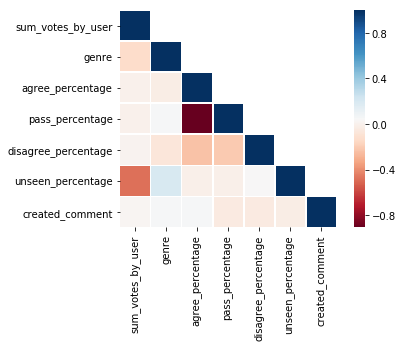

In [171]:
import seaborn as sns

def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)
# Calculando a correlação
corr = df_user_norm_1.corr() 
plot_corr(corr)

#### Fazer sem os usuários não identificados

In [172]:
df_groupby_user_male_female_1 = df_groupby_user_1.loc[(df_groupby_user_1.genre==1)|(df_groupby_user_1.genre==0)]

In [173]:
# Normalização dos dados
# df_user_norm_1_1 = (df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].max() - df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]].min())

In [174]:
# Normalização dos dados
df_user_norm_1_1 = (df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_male_female_1[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].std())

In [175]:
df_user_norm_1_1.corr()

,sum_votes_by_user,genre,agree_percentage,pass_percentage,disagree_percentage,unseen_percentage,created_comment
sum_votes_by_user,1.000000,0.134750,-0.091334,0.130820,-0.075413,-0.452161,0.131011
genre,0.134750,1.000000,0.077500,-0.052626,-0.053043,0.010597,0.108029
agree_percentage,-0.091334,0.077500,1.000000,-0.878288,-0.285011,0.091591,0.046130
pass_percentage,0.130820,-0.052626,-0.878288,1.000000,-0.207980,-0.211660,-0.020973
disagree_percentage,-0.075413,-0.053043,-0.285011,-0.207980,1.000000,0.236949,-0.052326
unseen_percentage,-0.452161,0.010597,0.091591,-0.211660,0.236949,1.000000,-0.002243
created_comment,0.131011,0.108029,0.046130,-0.020973,-0.052326,-0.002243,1.000000


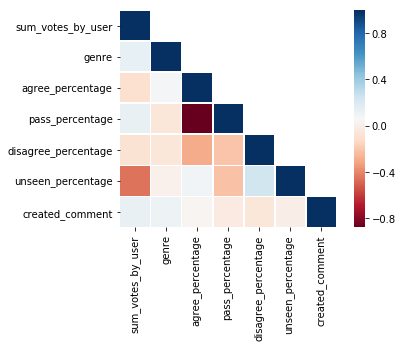

In [176]:
import seaborn as sns

def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)
# Calculando a correlação
corr = df_user_norm_1_1.corr() 
plot_corr(corr)

### 2.5.2 Conversa 02

In [177]:
comments.head()

,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id
0,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11
1,103,2018-11-23 14:36:48.164927+00,2018-11-23 14:36:48.166705+00,approved,2018-11-23 14:36:48.164938+00,Os orgãos de controle desestimulam a inovação ...,NaN,f,43,11
2,104,2018-11-23 14:36:48.16717+00,2018-11-23 14:36:48.168863+00,approved,2018-11-23 14:36:48.167179+00,Melhorar a convivência da gestão com o erro,NaN,f,43,11
3,105,2018-11-23 14:36:48.169373+00,2018-11-23 14:36:48.171207+00,approved,2018-11-23 14:36:48.169384+00,"Buscar novas formas de atingir resultados, mes...",NaN,f,43,11
4,106,2018-11-23 14:36:48.171686+00,2018-11-23 14:36:48.1735+00,approved,2018-11-23 14:36:48.171699+00,Os gestores precisam estar mais dispostos a c...,NaN,f,43,11


In [178]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,Os serviços devem ser cada vez mais oferecidos...,NaN,f,43,15,49.456522
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,A partir da mudança do marco normativo e da cu...,NaN,f,43,15,47.282609
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,Ouvindo o cidadão. Participação social na veia!,NaN,f,43,15,46.195652


In [179]:
# Agrupa por autor, criador do comentário

df_votes_by_author_2 = df_votes_conversation_2.groupby('author_id')['pass','agree','disagree','total_votes'].sum()

In [180]:
df_votes_by_author_2.reset_index(inplace=True)

In [181]:
df_votes_by_author_2.head()

,author_id,pass,agree,disagree,total_votes
0,43,202,197,28,427
1,61,6,14,2,22
2,71,6,14,2,22
3,93,22,37,2,61
4,94,30,42,3,75


In [182]:
len(df_votes_by_author_2)

81

In [183]:
df_groupby_user_2[df_groupby_user_2['user_id'].isin(df_votes_by_author_2.author_id.values)].shape, df_groupby_user_2.shape

((18, 7), (184, 7))

In [184]:
# Cria coluna para checar que o usuário já criou algum comentário
df_groupby_user_2['created_comment'] = 0
df_groupby_user_2.loc[df_groupby_user_2['user_id'].isin(df_votes_by_author_2.author_id.values), 'created_comment'] = 1

In [185]:
df_groupby_user_2.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre,created_comment
0,131,12,82,0,94,131.0,2.0,1
1,69,52,42,0,94,69.0,0.0,0
2,58,29,26,39,94,58.0,0.0,0
3,155,20,70,3,93,155.0,2.0,0
4,154,40,38,15,93,154.0,1.0,0


In [186]:
df_groupby_user_2['unseen'] = df_votes_conversation_2.shape[0] - df_groupby_user_2.sum_votes_by_user

In [187]:
# Cria colunas para verificar as porcentagens dos votos dos usuários
df_groupby_user_2['agree_percentage'] = df_groupby_user_2['agree']/df_groupby_user_2['sum_votes_by_user']
df_groupby_user_2['pass_percentage'] = df_groupby_user_2['pass']/df_groupby_user_2['sum_votes_by_user']
df_groupby_user_2['disagree_percentage'] = df_groupby_user_2['disagree']/df_groupby_user_2['sum_votes_by_user']
df_groupby_user_2['unseen_percentage'] = df_groupby_user_2['unseen']/df_groupby_user_2['sum_votes_by_user']

In [188]:
df_groupby_user_1.head()

,user_id,pass,agree,disagree,sum_votes_by_user,id,genre,created_comment,unseen,agree_percentage,pass_percentage,disagree_percentage,unseen_percentage
0,309,0,92,17,109,NaN,2.0,0,2,0.844037,0.000000,0.155963,0.018349
1,293,31,56,14,101,293.0,1.0,1,10,0.554455,0.306931,0.138614,0.099010
2,286,0,93,4,97,286.0,1.0,0,14,0.958763,0.000000,0.041237,0.144330
3,210,0,96,0,96,210.0,2.0,0,15,1.000000,0.000000,0.000000,0.156250
4,206,80,13,0,93,206.0,1.0,0,18,0.139785,0.860215,0.000000,0.193548


Interpretando p (correlação) [ref](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Interpretando_'%22%60UNIQ--postMath-0000000A-QINU%60%22'[1])

- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [189]:
from sklearn.preprocessing import MinMaxScaler

# Normalização usando a biblioteca sklearn

# b = df_groupby_user_2[['sum_votes_by_user','genre','created_comment','agree_percentage','pass_percentage','disagree_percentage']]
# scaler = MinMaxScaler()
# scaler.fit(b)
# df_user_norm_2 = pd.DataFrame(scaler.transform(b))

In [190]:
#df_user_norm_2.shape, df_groupby_user_2.shape

In [191]:
#df_user_norm_2.corr()

In [192]:
# Normalização dos dados
df_user_norm_2 = (df_groupby_user_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].std())

In [193]:
df_user_norm_2.corr()

,sum_votes_by_user,genre,agree_percentage,pass_percentage,disagree_percentage,unseen_percentage,created_comment
sum_votes_by_user,1.000000,-0.315856,-0.013881,0.019580,-0.016223,-0.501232,-0.055480
genre,-0.315856,1.000000,0.034447,-0.068493,0.094351,0.340443,0.093180
agree_percentage,-0.013881,0.034447,1.000000,-0.931146,-0.134055,0.066359,0.087755
pass_percentage,0.019580,-0.068493,-0.931146,1.000000,-0.236531,-0.040019,-0.061324
disagree_percentage,-0.016223,0.094351,-0.134055,-0.236531,1.000000,-0.068062,-0.067174
unseen_percentage,-0.501232,0.340443,0.066359,-0.040019,-0.068062,1.000000,0.137211
created_comment,-0.055480,0.093180,0.087755,-0.061324,-0.067174,0.137211,1.000000


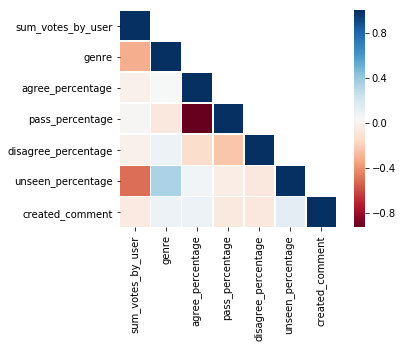

In [194]:
import seaborn as sns

# Calculando a correlação
corr = df_user_norm_2.corr() 
plot_corr(corr)

#### Fazer sem os usuários não identificados

In [195]:
df_groupby_user_male_female_2 = df_groupby_user_2.loc[(df_groupby_user_2.genre==1)|(df_groupby_user_2.genre==0)]

In [196]:
# Normalização dos dados
df_user_norm_2_1 = (df_groupby_user_male_female_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage','created_comment' ]] - df_groupby_user_male_female_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage','unseen_percentage', 'created_comment' ]].mean()) / (df_groupby_user_male_female_2[['sum_votes_by_user', 'genre', 'agree_percentage', 'pass_percentage', 'disagree_percentage', 'unseen_percentage', 'created_comment' ]].std())

In [197]:
df_user_norm_2_1.corr()

,sum_votes_by_user,genre,agree_percentage,pass_percentage,disagree_percentage,unseen_percentage,created_comment
sum_votes_by_user,1.000000,-0.047396,-0.068446,0.011291,0.212445,-0.594154,-0.082740
genre,-0.047396,1.000000,0.019377,-0.025249,0.023717,-0.038221,0.142619
agree_percentage,-0.068446,0.019377,1.000000,-0.964943,-0.061579,0.022681,0.071292
pass_percentage,0.011291,-0.025249,-0.964943,1.000000,-0.202540,0.010207,-0.084276
disagree_percentage,0.212445,0.023717,-0.061579,-0.202540,1.000000,-0.123445,0.054491
unseen_percentage,-0.594154,-0.038221,0.022681,0.010207,-0.123445,1.000000,0.113525
created_comment,-0.082740,0.142619,0.071292,-0.084276,0.054491,0.113525,1.000000


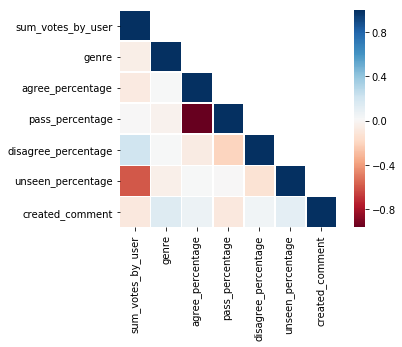

In [198]:
import seaborn as sns

def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)
# Calculando a correlação
corr = df_user_norm_2_1.corr() 
plot_corr(corr)

## 2.6 Features dos comentários

### 2.6.1 Conversa 01

In [199]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,Digitalizar urgente todos os serviços,NaN,f,43,11,31.645570
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,Implementar a identidade digital,NaN,f,43,11,31.392405
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11,31.139241


In [200]:
df_votes_conversation_1.shape

(111, 16)

In [201]:
# Dia da semana
# Monday/Segunda = 0 & Sunday/Domingo = 6

In [202]:
# Cria colunas com a data de aceitação/mudança do comentário, a hora e o dia da semana
df_votes_conversation_1['date_status_changed'] = pd.to_datetime(df_votes_conversation_1['status_changed']).dt.date
df_votes_conversation_1['time_status_changed'] = pd.to_datetime(df_votes_conversation_1['status_changed']).dt.time
df_votes_conversation_1['dayofweek_status_changed'] = pd.to_datetime(df_votes_conversation_1['status_changed']).dt.dayofweek

In [203]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,Digitalizar urgente todos os serviços,NaN,f,43,11,31.645570,2018-11-23,14:36:48.191324,4
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,Implementar a identidade digital,NaN,f,43,11,31.392405,2018-11-23,14:36:48.184917,4
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11,31.139241,2018-11-23,14:36:48.162103,4


Para cada número do dia da semana é representado da seguinte forma:

- 0: Monday - Segunda
- 1: Tuesday - Terça
- 2: Wednesday - Quarta
- 3: Thurday - Quinta
- 4: Friday - Sexta
- 5: Saturday - Sábado
- 6: Sunday - Domingo

In [204]:
df_votes_conversation_1.date_status_changed.max(), df_votes_conversation_1.date_status_changed.min()

(datetime.date(2019, 1, 12), datetime.date(2018, 11, 23))

In [205]:
df_votes_conversation_1.date_status_changed.unique()

array([datetime.date(2018, 11, 23), datetime.date(2018, 11, 24),
       datetime.date(2018, 11, 26), datetime.date(2018, 11, 27),
       datetime.date(2018, 11, 28), datetime.date(2018, 11, 29),
       datetime.date(2018, 12, 1), datetime.date(2019, 1, 12)],
      dtype=object)

In [206]:
# Cria uma coluna categorizando os dias da aceitação/mudança do comentário,
# ou seja, a partir dessa data os usuários teriam acesso aos comentários
def set_date_creation_category_conversation_1(row):
    if row["date_status_changed"] == datetime.date(2018, 11, 23):
        return 1
    elif row["date_status_changed"] == datetime.date(2018, 11, 24):
        return 2
    elif row["date_status_changed"] == datetime.date(2018, 11, 26):
        return 3
    elif row["date_status_changed"] == datetime.date(2018, 11, 27):
        return 4
    elif row["date_status_changed"] == datetime.date(2018, 11, 28):
        return 5
    elif row["date_status_changed"] == datetime.date(2018, 11, 29):
        return 9
    elif row["date_status_changed"] == datetime.date(2018, 12, 1):
        return 10
    elif row["date_status_changed"] == datetime.date(2019, 1, 12):
        return 11

df_votes_conversation_1['date_status_changed_category'] = df_votes_conversation_1.apply(set_date_creation_category_conversation_1, axis=1)

In [207]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,Digitalizar urgente todos os serviços,NaN,f,43,11,31.645570,2018-11-23,14:36:48.191324,4,1
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,Implementar a identidade digital,NaN,f,43,11,31.392405,2018-11-23,14:36:48.184917,4,1
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,Mudar a legislação para permitir práticas inov...,NaN,f,43,11,31.139241,2018-11-23,14:36:48.162103,4,1


In [208]:
# Cria feature com o tamanho do comentário
def set_content_size(row):
    return len(row.content)
df_votes_conversation_1['content_size'] = df_votes_conversation_1.apply(set_content_size, axis=1)

In [209]:
# Cria feature com a quantidade de palavras no comentário
df_votes_conversation_1['content_word_count'] = df_votes_conversation_1['content'].apply(lambda x: len(str(x).split(" ")))

In [210]:
df_votes_conversation_1.head()

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,...,f,43,11,31.645570,2018-11-23,14:36:48.191324,4,1,37,5
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,...,f,43,11,31.392405,2018-11-23,14:36:48.184917,4,1,32,4
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,...,f,43,11,31.139241,2018-11-23,14:36:48.162103,4,1,52,7
3,116,29,87,5,121,116,2018-11-23 14:36:48.193594+00,2018-11-23 14:36:48.19539+00,approved,2018-11-23 14:36:48.193605+00,...,f,43,11,30.632911,2018-11-23,14:36:48.193605,4,1,77,11
4,114,34,81,5,120,114,2018-11-23 14:36:48.189092+00,2018-11-23 14:36:48.190846+00,approved,2018-11-23 14:36:48.189102+00,...,f,43,11,30.379747,2018-11-23,14:36:48.189102,4,1,53,6


### 2.6.2 Nuvem de palavras

In [211]:
# Importa biblioteca para a criação da wordcloud

from wordcloud import WordCloud
import nltk

In [212]:
# Baixa stopwords da língua portuguesa
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords = set(stopwords)

[nltk_data] Downloading package stopwords to /home/naiara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
# Trata os conteúdos dos comentários

comment_words = ' '
  
for val in df_votes_conversation_1.content: 
      
    # transforma cada val em string
    val = str(val) 
  
    # divide as frases por espaços 
    tokens = val.split() 
      
    # converte cada token em letra minúscula
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
    # retira as stopwords
    for word in tokens: 
        if word not in stopwords:
            comment_words = comment_words + word + ' '

In [214]:
wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='white', 
                #stopwords = stopwords,
                min_font_size = 10)

In [215]:
wordcloud_1 = wordcloud.generate(comment_words)

In [216]:
# Frequência das palavras
word_frequency = wordcloud_1.process_text(comment_words)

In [217]:
from collections import Counter 

In [218]:
# Ordem das palavras mais citadas
counter1 = Counter(word_frequency)
counter1.most_common()[:10]

[('cidadão', 66),
 ('serviço', 23),
 ('tecnologia', 20),
 ('governo', 20),
 ('público', 17),
 ('necessidade', 17),
 ('demanda', 16),
 ('serviços públicos', 14),
 ('forma', 14),
 ('inovação', 13)]

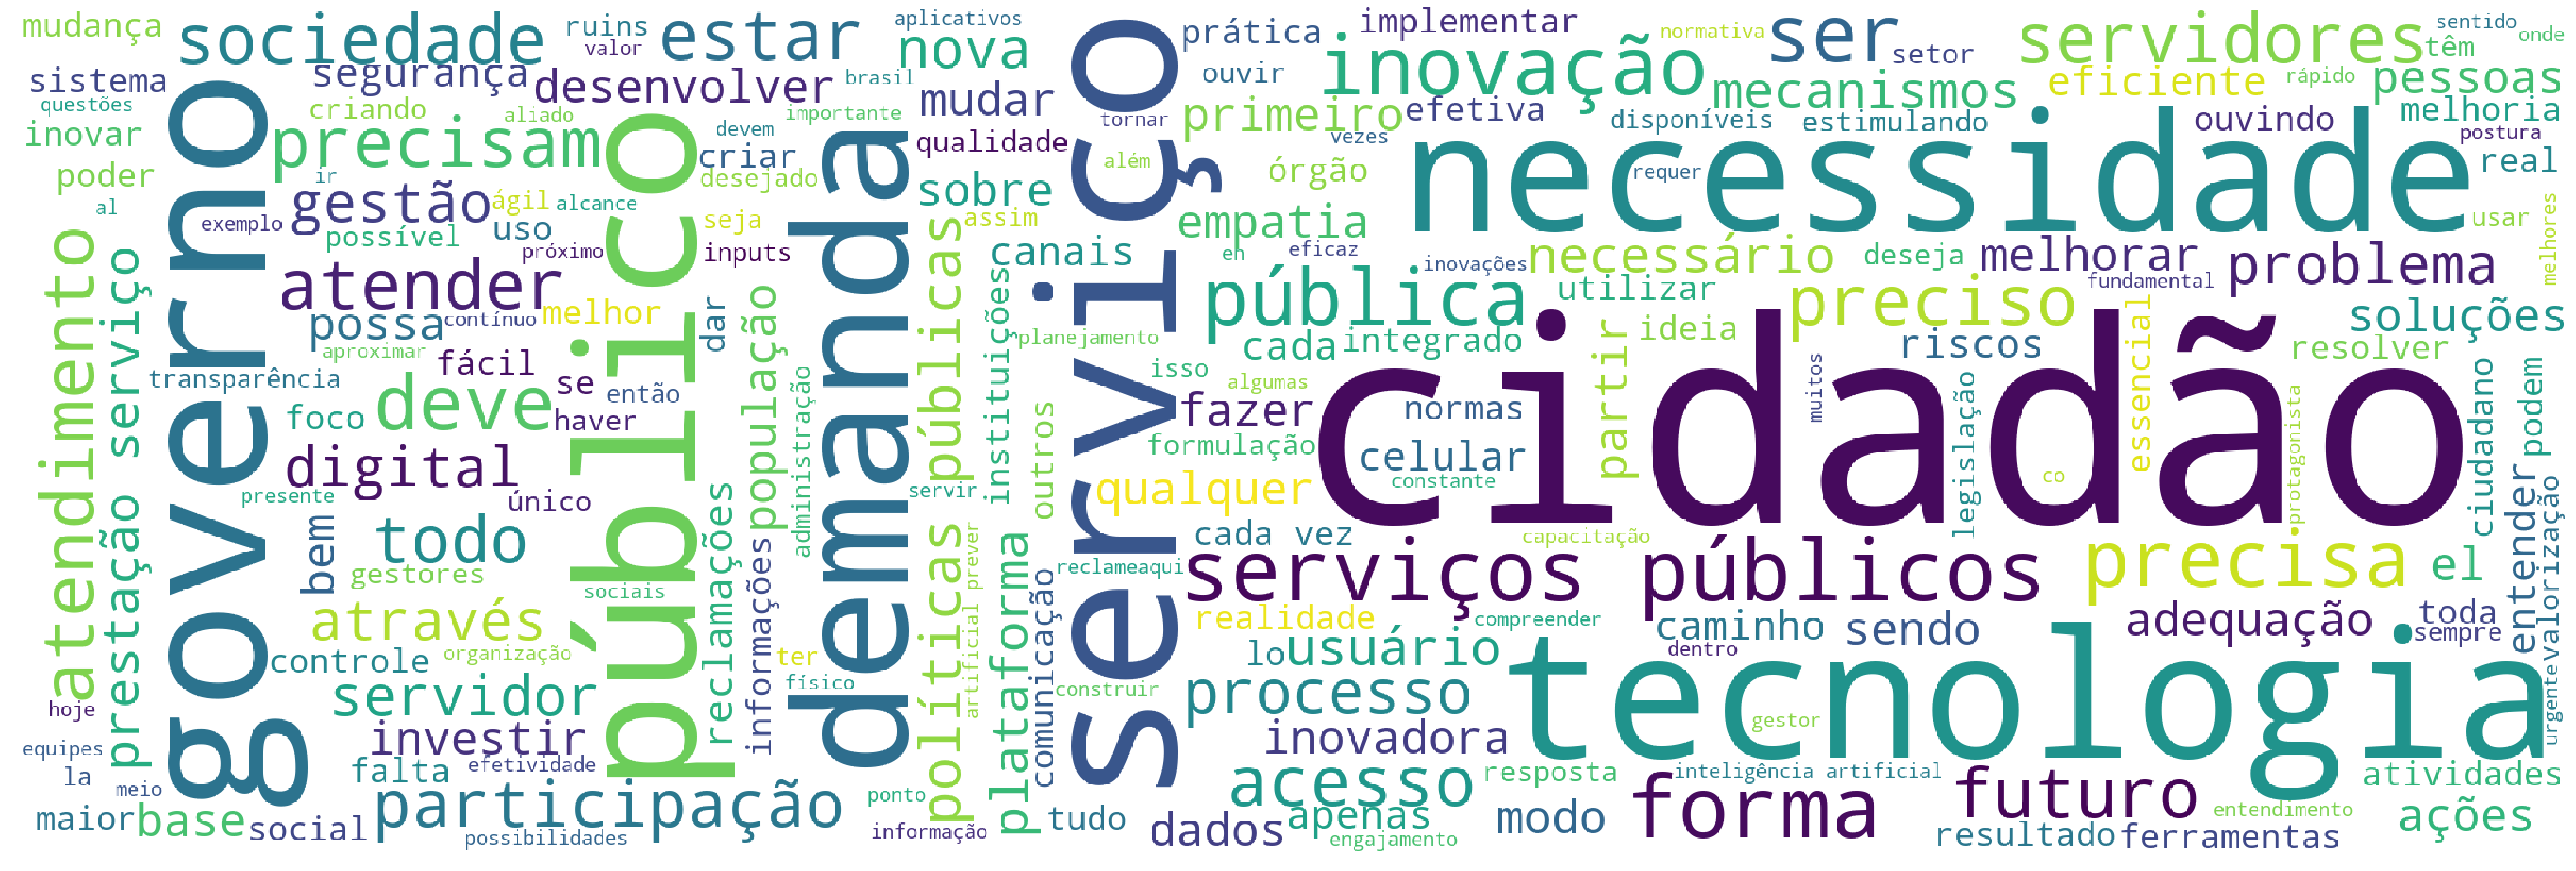

In [219]:
# Salva a imagem da nuvem de palavras                   
plt.figure(figsize = (60, 20), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.savefig('images/nuvem_palavras_conversa_1.png')

### 2.6.3 Conversa 02

In [220]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,Os serviços devem ser cada vez mais oferecidos...,NaN,f,43,15,49.456522
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,A partir da mudança do marco normativo e da cu...,NaN,f,43,15,47.282609
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,Ouvindo o cidadão. Participação social na veia!,NaN,f,43,15,46.195652


In [221]:
df_votes_conversation_2.shape

(97, 16)

In [222]:
# Dia da semana
# Monday/Segunda = 0 & Sunday/Domingo = 6

In [223]:
# Cria colunas com a data de aceitação/mudança do comentário, a hora e o dia da semana
df_votes_conversation_2['date_status_changed'] = pd.to_datetime(df_votes_conversation_2['status_changed']).dt.date
df_votes_conversation_2['time_status_changed'] = pd.to_datetime(df_votes_conversation_2['status_changed']).dt.time
df_votes_conversation_2['dayofweek_status_changed'] = pd.to_datetime(df_votes_conversation_2['status_changed']).dt.dayofweek

In [224]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,Os serviços devem ser cada vez mais oferecidos...,NaN,f,43,15,49.456522,2018-11-27,18:59:23.149559,1
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,A partir da mudança do marco normativo e da cu...,NaN,f,43,15,47.282609,2018-11-27,18:59:23.144911,1
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,Ouvindo o cidadão. Participação social na veia!,NaN,f,43,15,46.195652,2018-11-27,18:59:23.151748,1


Para cada número do dia da semana é representado da seguinte forma:

- 0: Monday - Segunda
- 1: Tuesday - Terça
- 2: Wednesday - Quarta
- 3: Thurday - Quinta
- 4: Friday - Sexta
- 5: Saturday - Sábado
- 6: Sunday - Domingo

In [225]:
df_votes_conversation_2.date_status_changed.max(), df_votes_conversation_2.date_status_changed.min()

(datetime.date(2018, 11, 29), datetime.date(2018, 11, 27))

In [226]:
df_votes_conversation_2.date_status_changed.unique()

array([datetime.date(2018, 11, 27), datetime.date(2018, 11, 28),
       datetime.date(2018, 11, 29)], dtype=object)

In [227]:
# Cria uma coluna categorizando os dias da aceitação/mudança do comentário,
# ou seja, a partir dessa data os usuários teriam acesso aos comentários
def set_date_creation_category_conversation_2(row):
    if row["date_status_changed"] == datetime.date(2018, 11, 27):
        return 1
    elif row["date_status_changed"] == datetime.date(2018, 11, 28):
        return 2
    elif row["date_status_changed"] == datetime.date(2018, 11, 29):
        return 3

df_votes_conversation_2['date_status_changed_category'] = df_votes_conversation_2.apply(set_date_creation_category_conversation_2, axis=1)

In [228]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,content,rejection_reason,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,Os serviços devem ser cada vez mais oferecidos...,NaN,f,43,15,49.456522,2018-11-27,18:59:23.149559,1,1
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,A partir da mudança do marco normativo e da cu...,NaN,f,43,15,47.282609,2018-11-27,18:59:23.144911,1,1
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,Ouvindo o cidadão. Participação social na veia!,NaN,f,43,15,46.195652,2018-11-27,18:59:23.151748,1,1


In [229]:
# Cria coluna com tamanho do comentário
df_votes_conversation_2['content_size'] = df_votes_conversation_2.apply(set_content_size, axis=1)

In [230]:
# Cria coluna com a quantidade de palavras 
df_votes_conversation_2['content_word_count'] = df_votes_conversation_2['content'].apply(lambda x: len(str(x).split(" ")))

In [231]:
df_votes_conversation_2.head()

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,...,f,43,15,49.456522,2018-11-27,18:59:23.149559,1,1,103,16
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,...,f,43,15,47.282609,2018-11-27,18:59:23.144911,1,1,70,13
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,...,f,43,15,46.195652,2018-11-27,18:59:23.151748,1,1,47,7
3,225,35,42,6,83,225,2018-11-27 18:59:23.147443+00,2018-11-27 18:59:23.149099+00,approved,2018-11-27 18:59:23.147453+00,...,f,43,15,45.108696,2018-11-27,18:59:23.147453,1,1,74,14
4,261,29,48,5,82,261,2018-11-27 22:18:40.859139+00,2018-11-28 00:31:38.246579+00,approved,2018-11-28 00:31:38.246587+00,...,f,451,15,44.565217,2018-11-28,00:31:38.246587,2,2,53,9


### 2.6.4 Nuvem de palavras

In [232]:
# Trata os conteúdos dos comentários
comment_words_2 = ' '
  
# iterate through the csv file 
for val in df_votes_conversation_2.content: 
      
    # transforma cada val em string
    val = str(val) 
  
    # divide as frases por espaços
    tokens = val.split() 
      
    # converte cada token em letra minúscula 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
    # retira as stopwords
    for word in tokens: 
        if word not in stopwords:
            comment_words_2 = comment_words_2 + word + ' '

In [233]:
wordcloud_2 = wordcloud.generate(comment_words_2)

In [234]:
# Frequência das palavras
word_frequency_2 = wordcloud_2.process_text(comment_words_2)

In [235]:
# Ordem das palavras mais citadas
counter2 = Counter(word_frequency_2)
counter2.most_common()[:10]

[('cidadão', 29),
 ('serviço', 20),
 ('transformação digital', 18),
 ('governo', 18),
 ('digital', 17),
 ('dados', 16),
 ('ser', 14),
 ('tecnologia', 13),
 ('forma', 12),
 ('servidores', 10)]

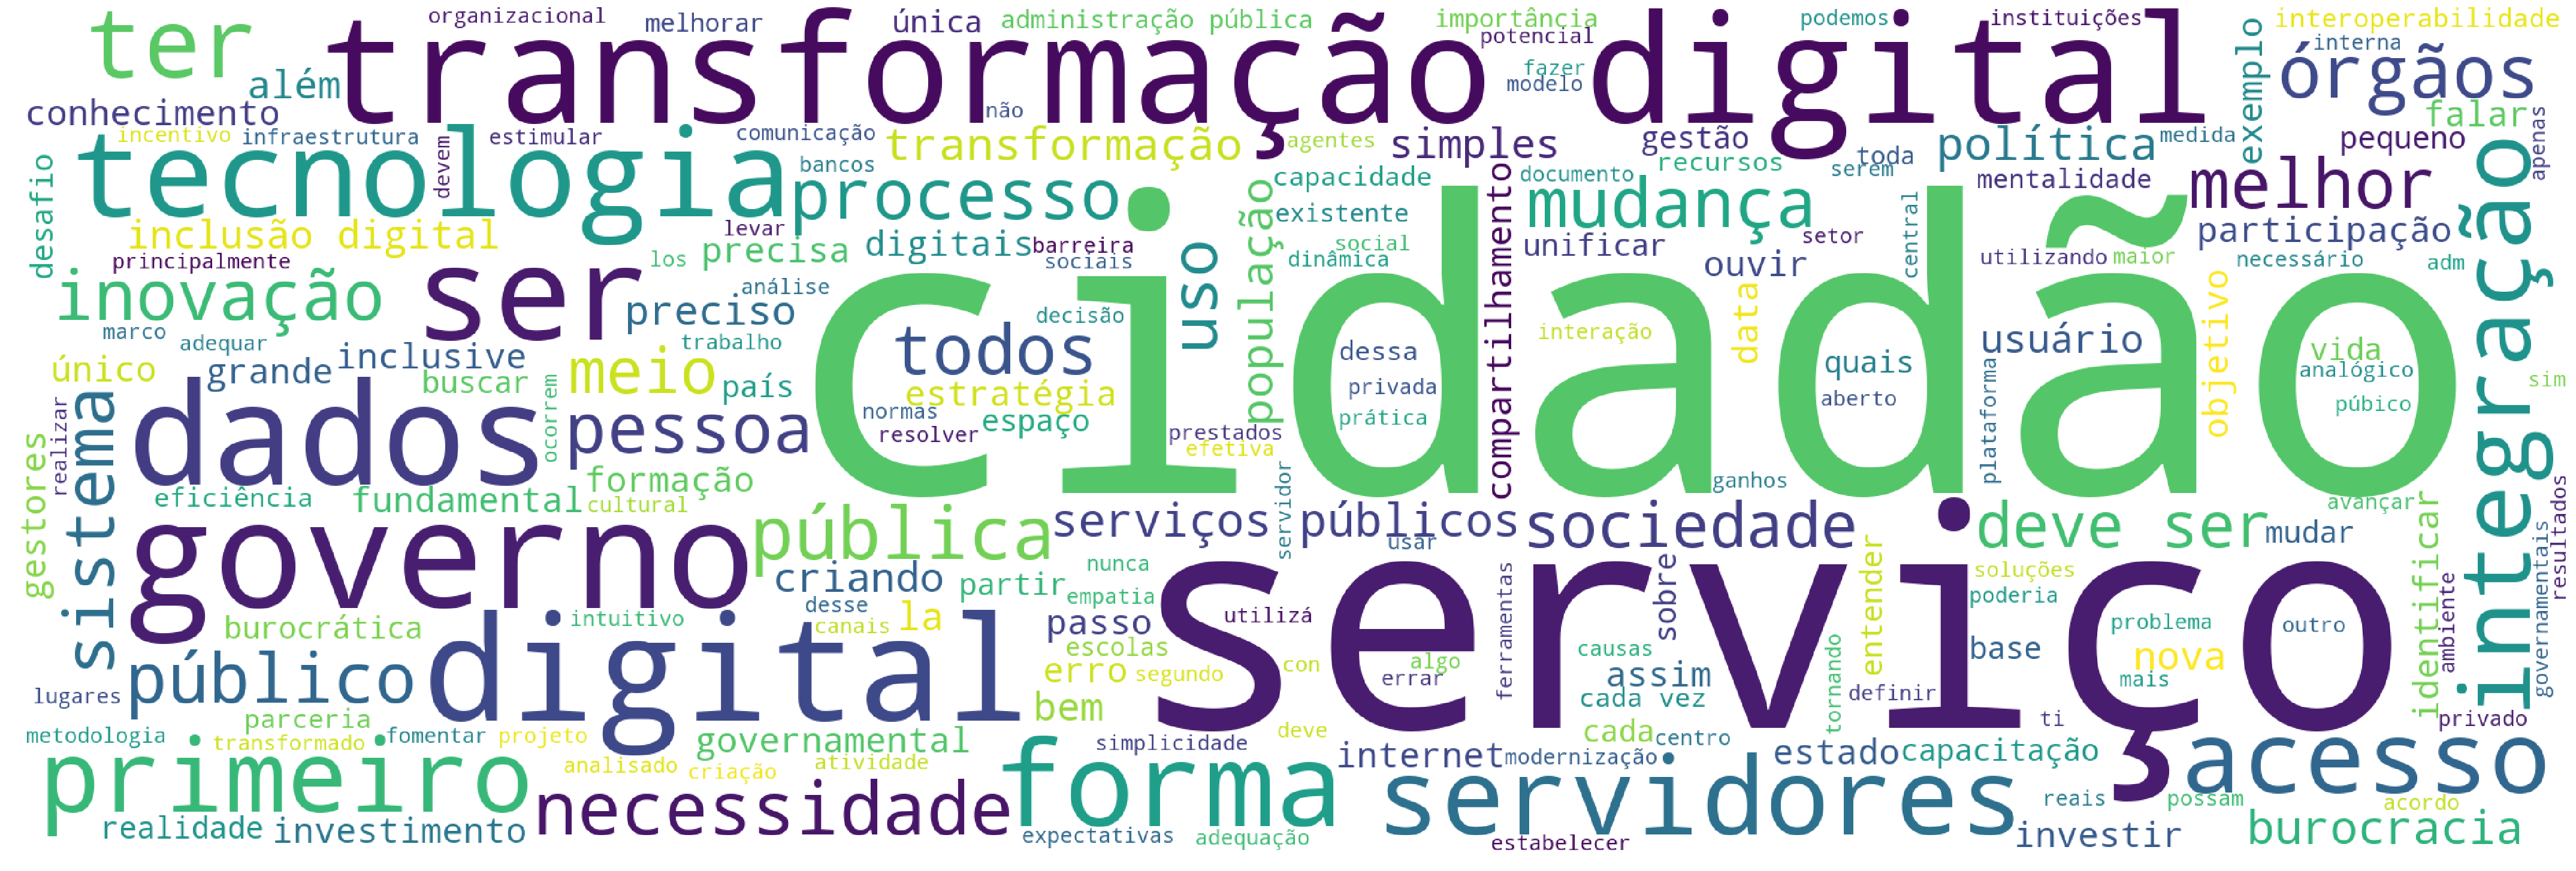

In [236]:
# Salva a imagem da nuvem de palavras dos comentários                        
plt.figure(figsize = (60, 20), facecolor = None) 
plt.imshow(wordcloud_2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
wordcloud_2.to_file('images/nuvem_palavras_conversa_2.png')    
#plt.savefig('images/nuvem_palavras_conversa_2-1.png')

### Cluster por comentários

In [237]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,is_promoted,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,...,f,43,11,31.645570,2018-11-23,14:36:48.191324,4,1,37,5
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,...,f,43,11,31.392405,2018-11-23,14:36:48.184917,4,1,32,4
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,...,f,43,11,31.139241,2018-11-23,14:36:48.162103,4,1,52,7


### Tamanho médio de cada palavra

## Conversa 01

In [238]:
# Cria feature com o tamanho do comentário sem espaços
def set_content_size_without_space(row):
    return len(row.content.replace(' ',''))
df_votes_conversation_1['content_size_wht_space'] = df_votes_conversation_1.apply(set_content_size_without_space, axis=1)

In [239]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count,content_size_wht_space
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,...,43,11,31.645570,2018-11-23,14:36:48.191324,4,1,37,5,33
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,...,43,11,31.392405,2018-11-23,14:36:48.184917,4,1,32,4,29
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,...,43,11,31.139241,2018-11-23,14:36:48.162103,4,1,52,7,46


In [240]:
df_votes_conversation_1['average_words']=df_votes_conversation_1['content_size_wht_space']/df_votes_conversation_1['content_word_count']

In [241]:
df_votes_conversation_1.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count,content_size_wht_space,average_words
0,115,41,73,11,125,115,2018-11-23 14:36:48.191314+00,2018-11-23 14:36:48.193121+00,approved,2018-11-23 14:36:48.191324+00,...,11,31.645570,2018-11-23,14:36:48.191324,4,1,37,5,33,6.600000
1,112,39,79,6,124,112,2018-11-23 14:36:48.184906+00,2018-11-23 14:36:48.18656+00,approved,2018-11-23 14:36:48.184917+00,...,11,31.392405,2018-11-23,14:36:48.184917,4,1,32,4,29,7.250000
2,102,39,72,12,123,102,2018-11-23 14:36:48.162088+00,2018-11-23 14:36:48.164338+00,approved,2018-11-23 14:36:48.162103+00,...,11,31.139241,2018-11-23,14:36:48.162103,4,1,52,7,46,6.571429


In [242]:
df_votes_conversation_1.columns

Index(['comment', 'pass', 'agree', 'disagree', 'total_votes', 'id', 'created',
       'modified', 'status', 'status_changed', 'content', 'rejection_reason',
       'is_promoted', 'author_id', 'conversation_id', 'participation',
       'date_status_changed', 'time_status_changed',
       'dayofweek_status_changed', 'date_status_changed_category',
       'content_size', 'content_word_count', 'content_size_wht_space',
       'average_words'],
      dtype='object')

In [243]:
columns = ['pass', 'agree', 'disagree','total_votes','date_status_changed_category','content_size','average_words']

In [244]:
df_comments_conversation_1 = df_votes_conversation_1[columns]

In [245]:
# Normalização dos dados min max 
# df_comments_conversation_1 = (df_comments_conversation_1 - df_comments_conversation_1.min()) / (df_comments_conversation_1.max() - df_comments_conversation_1.min())

In [246]:
# Normalização dos dados mean
df_mean_norm_conversation_1 = (df_comments_conversation_1 - df_comments_conversation_1.mean()) / df_comments_conversation_1.std() 
#(df-df.mean())/df.std()

In [247]:
df_mean_norm_conversation_1.head()

,pass,agree,disagree,total_votes,date_status_changed_category,content_size,average_words
0,2.499376,1.922294,1.707918,2.217051,-1.566393,-1.588563,1.239883
1,2.301706,2.191537,0.569989,2.187737,-1.566393,-1.658596,2.094308
2,2.301706,1.877421,1.935503,2.158423,-1.566393,-1.378462,1.202326
3,1.313352,2.550527,0.342404,2.099795,-1.566393,-1.028294,0.570683
4,1.807529,2.281284,0.342404,2.070480,-1.566393,-1.364455,3.080184


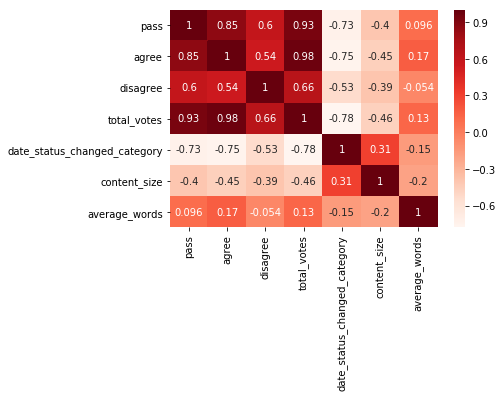

In [248]:
sns.heatmap(df_mean_norm_conversation_1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [249]:
# Redução de dimensionalidade
pca = PCA(n_components=2).fit_transform(df_mean_norm_conversation_1)

### Kmeans

In [250]:
# Assumindo 4 a quantidade de clusters para a classificação de perfis 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [251]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[-0.28874824 -0.6003657 ]
 [ 3.65223242 -0.05431142]
 [-2.4551295  -0.23341584]
 [-0.40740111  1.06792774]]


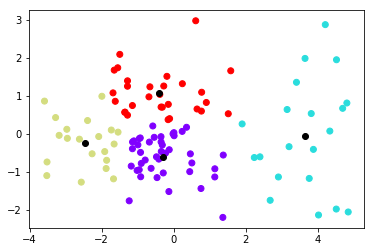

In [252]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

## Conversa 02

In [253]:
# Cria feature com o tamanho do comentário sem espaços

df_votes_conversation_2['content_size_wht_space'] = df_votes_conversation_2.apply(set_content_size_without_space, axis=1)

In [254]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,author_id,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count,content_size_wht_space
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,...,43,15,49.456522,2018-11-27,18:59:23.149559,1,1,103,16,88
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,...,43,15,47.282609,2018-11-27,18:59:23.144911,1,1,70,13,58
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,...,43,15,46.195652,2018-11-27,18:59:23.151748,1,1,47,7,41


In [255]:
df_votes_conversation_2['average_words']=df_votes_conversation_2['content_size_wht_space']/df_votes_conversation_2['content_word_count']

In [256]:
df_votes_conversation_2.head(3)

,comment,pass,agree,disagree,total_votes,id,created,modified,status,status_changed,...,conversation_id,participation,date_status_changed,time_status_changed,dayofweek_status_changed,date_status_changed_category,content_size,content_word_count,content_size_wht_space,average_words
0,226,45,42,4,91,226,2018-11-27 18:59:23.149549+00,2018-11-27 18:59:23.151189+00,approved,2018-11-27 18:59:23.149559+00,...,15,49.456522,2018-11-27,18:59:23.149559,1,1,103,16,88,5.500000
1,224,46,34,7,87,224,2018-11-27 18:59:23.144897+00,2018-11-27 18:59:23.146901+00,approved,2018-11-27 18:59:23.144911+00,...,15,47.282609,2018-11-27,18:59:23.144911,1,1,70,13,58,4.461538
2,227,38,44,3,85,227,2018-11-27 18:59:23.151738+00,2018-11-27 18:59:23.15333+00,approved,2018-11-27 18:59:23.151748+00,...,15,46.195652,2018-11-27,18:59:23.151748,1,1,47,7,41,5.857143


In [257]:
df_votes_conversation_2.columns

Index(['comment', 'pass', 'agree', 'disagree', 'total_votes', 'id', 'created',
       'modified', 'status', 'status_changed', 'content', 'rejection_reason',
       'is_promoted', 'author_id', 'conversation_id', 'participation',
       'date_status_changed', 'time_status_changed',
       'dayofweek_status_changed', 'date_status_changed_category',
       'content_size', 'content_word_count', 'content_size_wht_space',
       'average_words'],
      dtype='object')

In [258]:
#columns = ['pass', 'agree', 'disagree','total_votes','date_status_changed_category','content_size','average_words']

In [259]:
df_comments_conversation_2 = df_votes_conversation_2[columns]

In [260]:
# Normalização dos dados min max
# df_comments_conversation_2 = (df_comments_conversation_2 - df_comments_conversation_2.min()) / (df_comments_conversation_2.max() - df_comments_conversation_2.min())

In [261]:
# Normalização dos dados mean
df_mean_norm_conversation_2 = (df_comments_conversation_2 - df_comments_conversation_2.mean()) / df_comments_conversation_2.std() 
#(df-df.mean())/df.std()

In [262]:
df_mean_norm_conversation_2.head()

,pass,agree,disagree,total_votes,date_status_changed_category,content_size,average_words
0,2.941687,1.824859,1.061452,2.420366,-3.098387,-0.882928,-0.334915
1,3.033614,1.215526,2.532322,2.253800,-3.098387,-1.358087,-2.070834
2,2.298193,1.977193,0.571162,2.170516,-3.098387,-1.689260,0.262094
3,2.022410,1.824859,2.042032,2.087233,-3.098387,-1.300492,-2.245344
4,1.470843,2.281860,1.551742,2.045591,0.000000,-1.602867,-1.170728


In [263]:
#df_comments_conversation_1.corr()

In [264]:
df_mean_norm_conversation_2.corr()

,pass,agree,disagree,total_votes,date_status_changed_category,content_size,average_words
pass,1.000000,0.825195,0.630058,0.957643,-0.572622,-0.296690,-0.233873
agree,0.825195,1.000000,0.339073,0.949314,-0.467071,-0.278373,-0.209673
disagree,0.630058,0.339073,1.000000,0.555715,-0.411425,-0.200234,-0.284402
total_votes,0.957643,0.949314,0.555715,1.000000,-0.549687,-0.303593,-0.244727
date_status_changed_category,-0.572622,-0.467071,-0.411425,-0.549687,1.000000,0.238865,0.293832
content_size,-0.296690,-0.278373,-0.200234,-0.303593,0.238865,1.000000,0.059862
average_words,-0.233873,-0.209673,-0.284402,-0.244727,0.293832,0.059862,1.000000


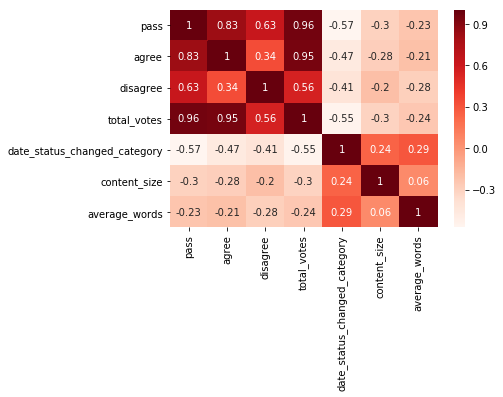

In [265]:
sns.heatmap(df_mean_norm_conversation_2.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [266]:
# import statsmodels.api as sm

# X_1 = sm.add_constant(df_comments_conversation_2)
# #Fitting sm.OLS model
# model = sm.OLS(columns,X_1).fit()
# model.pvalues

In [267]:
# Redução de dimensionalidade
pca = PCA(n_components=2).fit_transform(df_mean_norm_conversation_2)

### Kmeans

In [268]:
# Assumindo 4 a quantidade de clusters para a classificação de perfis 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [269]:
# x, y dos pontos centrais de cada cluster
print(kmeans.cluster_centers_)

[[-1.49893181  0.50359647]
 [ 1.29518271  0.43492422]
 [-0.75094216 -1.03608442]
 [ 4.72101478 -0.17431889]]


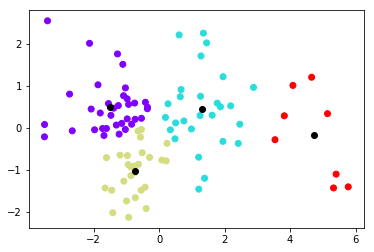

In [270]:
plt.scatter(pca[:,0],pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')

In [271]:
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]  
# X = df_comments_conversation_2.iloc[:,:]  #independent columns
# y = df_comments_conversation_2.columns    #target column i.e price range

# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

## LDA

### Conversa 01

In [272]:
from sklearn.decomposition import LatentDirichletAllocation

In [273]:
lda = LatentDirichletAllocation(n_components=4,
    random_state=0)

In [274]:
df_minmax_norm_conversation_1 = (df_comments_conversation_1 - df_comments_conversation_1.min())/(df_comments_conversation_1.max()-df_comments_conversation_1.min())

In [275]:
lda.fit(df_minmax_norm_conversation_1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [276]:
df_lda_1 = lda.transform(df_minmax_norm_conversation_1)

In [277]:
df_lda_1[:3]

array([[0.05368018, 0.84399978, 0.05116065, 0.05115939],
       [0.05382513, 0.84364601, 0.05126499, 0.05126388],
       [0.05402249, 0.84396246, 0.0510081 , 0.05100695]])

In [278]:
T = df_lda_1.T

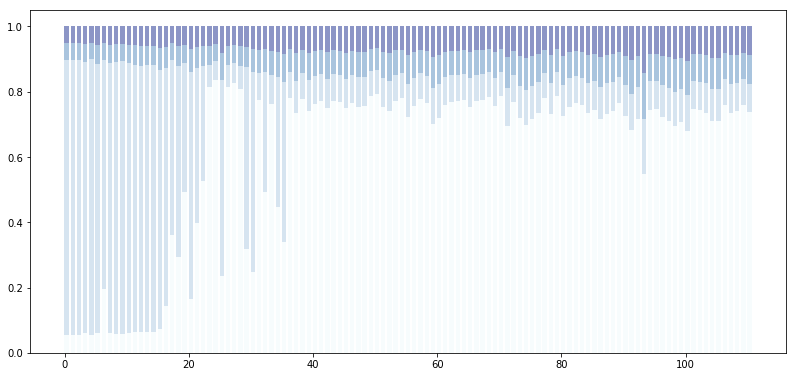

In [279]:
columns = ['%d' % x for x in range(T.shape[1])]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #rows #['r','g','b','magenta']
n_rows = 4

index = np.arange(len(columns)) + 0.3
bar_width = 0.7

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
plt.figure(figsize=(15,7))
#cell_text = []
for row in range(n_rows):
    plt.bar(index, T[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + T[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
#cell_text.reverse()


# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)


plt.show()

## Conversa 02

In [280]:
# normalizacao min max
df_minmax_norm_conversation_2 = (df_comments_conversation_2 - df_comments_conversation_2.min())/(df_comments_conversation_2.max()-df_comments_conversation_2.min())

In [281]:
lda.fit(df_minmax_norm_conversation_2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [282]:
df_lda_2 = lda.transform(df_minmax_norm_conversation_2)

In [283]:
df_lda_2[:3]

array([[0.05512314, 0.05532638, 0.83692642, 0.05262406],
       [0.05692801, 0.05789026, 0.83029578, 0.05488595],
       [0.05790354, 0.05956841, 0.82353435, 0.0589937 ]])

In [284]:
T = df_lda_2.T

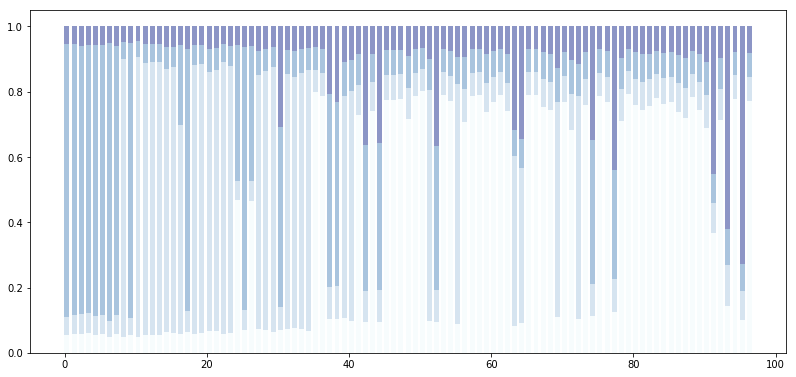

In [285]:
columns = ['%d' % x for x in range(T.shape[1])]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #rows #['r','g','b','magenta']
n_rows = 4

index = np.arange(len(columns)) + 0.3
bar_width = 0.7

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
plt.figure(figsize=(15,7))
#cell_text = []
for row in range(n_rows):
    plt.bar(index, T[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + T[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
#cell_text.reverse()


# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)


plt.show()